In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data1= pd.read_json('Order_breakdown.json')
print(data1.shape)
data1.head()

(8047, 9)


,Order ID,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,13.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,8.5,17,-1,2,Office Supplies,Storage


In [ ]:
data2= pd.read_csv('Order.tsv',sep='\t')
print(data2.shape)
data2.head()

(4117, 11)


,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship
0,BN-2011-7407039,1-1-13,Ruby Patel,Stockholm,Sweden,North,Home Office,1-5-13,Economy Plus,Stockholm,4
1,AZ-2011-9050313,1-3-13,Summer Hayward,Southport,United Kingdom,North,Consumer,1-7-13,Economy,England,4
2,AZ-2011-6674300,1-4-13,Devin Huddleston,Valence,France,Central,Consumer,1-8-13,Economy,Auvergne-Rhône-Alpes,4
3,BN-2011-2819714,1-4-13,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5
4,AZ-2011-617423,1-5-13,Daniel Burke,Echirolles,France,Central,Home Office,1-7-13,Priority,Auvergne-Rhône-Alpes,2


In [ ]:
df =pd.merge(data1,data2,on='Order ID')

In [ ]:
df.to_csv('df')

In [ ]:
print(df.isnull().sum())
print('total duplicated before',df.duplicated().sum())
df.drop_duplicates(inplace= True)
print('total duplicated after',df.duplicated().sum())
print(df.shape)

Order ID           0
Product Name       0
Discount           0
Actual Discount    0
Sales              0
Profit             0
Quantity           0
Category           0
Sub-Category       0
Order Date         0
Customer Name      0
City               0
Country            0
Region             0
Segment            0
Ship Date          0
Ship Mode          0
State              0
Days to Ship       0
dtype: int64
total duplicated before 2
total duplicated after 0
(8045, 19)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# creating a for loop to check unique values of all the columns if values of the unique value is less than 10 we will print value count of
#unique values too else we will just show how many unique values are there.

for i in df.columns:
    # Check if the number of unique values in the column is less than 10

    if df[i].nunique() < 10:
        # Print column information, including the column name, data type, number of unique values, and value counts
        print(f'The column "{i}" is __{df[i].dtype}__ \nhas __{df[i].nunique()}__ unique values: \n{df[i].value_counts()}')
        # Print a separator line
        print(40*'_')
    else:
        # Print column information, including the column name, data type, and number of unique values
        print(f'The column "{i}" is __{df[i].dtype}__ \nhas __{df[i].nunique()}__ unique values')
        # Print a separator line
        print(40*'_')


The column "Order ID" is __object__ 
has __4117__ unique values
________________________________________
The column "Product Name" is __object__ 
has __1810__ unique values
________________________________________
The column "Discount" is __float64__ 
has __14__ unique values
________________________________________
The column "Actual Discount" is __float64__ 
has __1256__ unique values
________________________________________
The column "Sales" is __int64__ 
has __1248__ unique values
________________________________________
The column "Profit" is __int64__ 
has __845__ unique values
________________________________________
The column "Quantity" is __int64__ 
has __14__ unique values
________________________________________
The column "Category" is __object__ 
has __3__ unique values: 
Office Supplies    5284
Technology         1523
Furniture          1238
Name: Category, dtype: int64
________________________________________
The column "Sub-Category" is __object__ 
has __17__ unique v

In [ ]:
dfc=df[[ 'Category', 'Sub-Category',
       'Country', 'Region', 'Segment',
       'Ship Mode']]

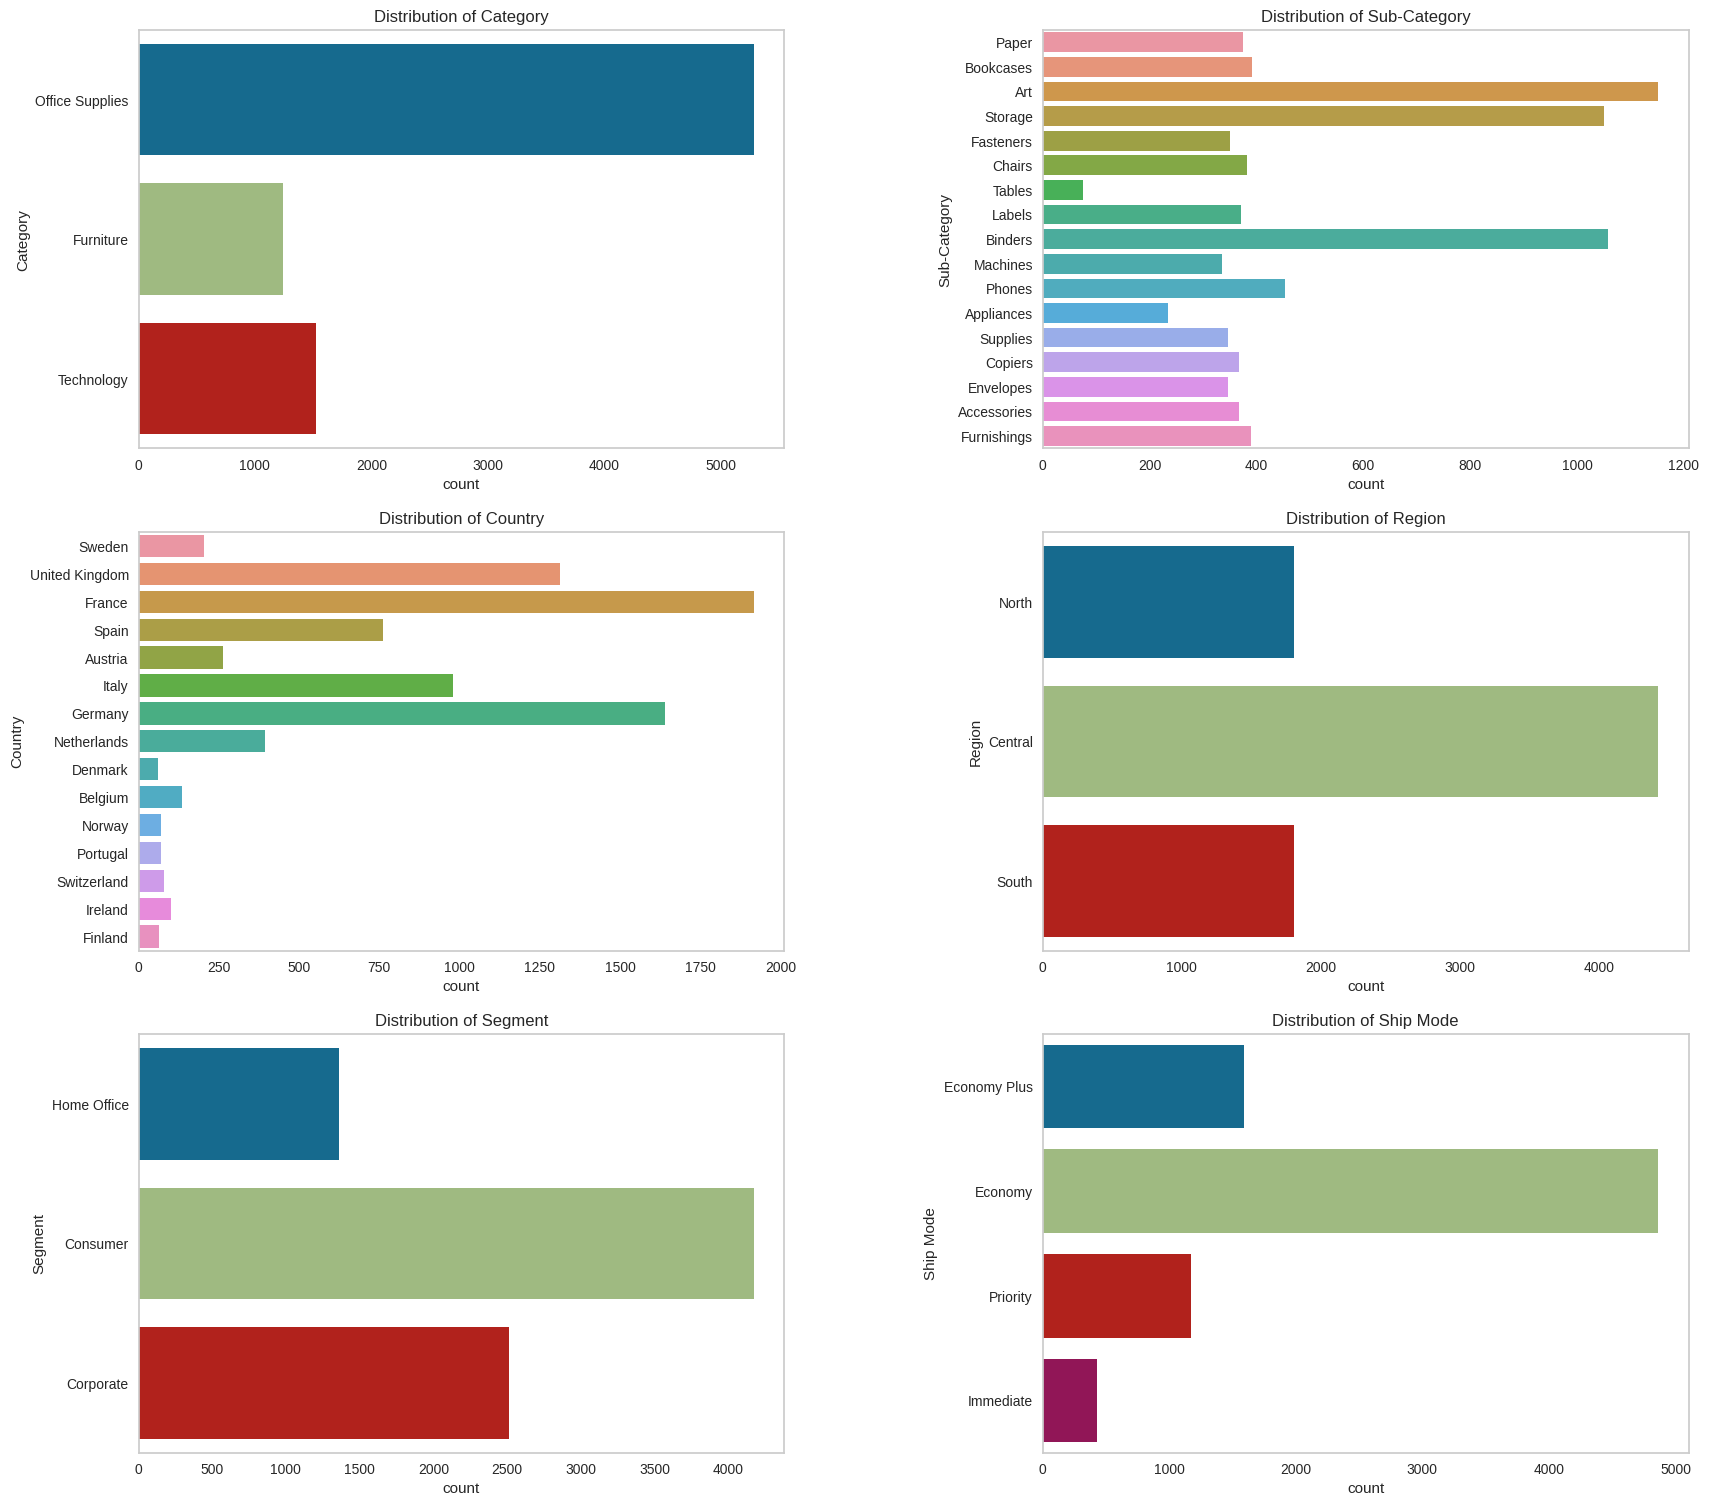

In [ ]:
x = 0
fig = plt.figure(figsize=(20, 25))  # Create a figure with the specified size
plt.subplots_adjust(wspace=0.4)  # Adjust the spacing between subplots

# Iterate over each column in the DataFrame dfc
for i in dfc.columns:
    ax = plt.subplot(421 + x)  # Create a subplot at position 321+x in a 3x2 grid
    ax = sns.countplot(data=dfc, y=i)  # Create a countplot using data from dfc with y-axis representing the column values
    plt.grid(axis='x')  # Add gridlines along the x-axis
    ax.set_title(f'Distribution of {i}')  # Set the title of the subplot
    x += 1  # Increment x to move to the next subplot position

most sold category is office supplies

1.   most sold category is office supplies.
2.   top 3 in terms of orders are uk,germany and france is no1.
3.   Most of the sales are from Consumer segment
4.   Most used ship mode in Economy





In [ ]:
df['Margin']= df['Profit']/df['Sales'] *100

In [ ]:
df.head()

,Order ID,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship,Margin
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper,1-1-13,Ruby Patel,Stockholm,Sweden,North,Home Office,1-5-13,Economy Plus,Stockholm,4,-57.777778
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases,1-3-13,Summer Hayward,Southport,United Kingdom,North,Consumer,1-7-13,Economy,England,4,33.957845
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,21,3,Office Supplies,Art,1-4-13,Devin Huddleston,Valence,France,Central,Consumer,1-8-13,Economy,Auvergne-Rhône-Alpes,4,15.000000
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,13.5,27,-22,2,Office Supplies,Art,1-4-13,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5,-81.481481
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,8.5,17,-1,2,Office Supplies,Storage,1-4-13,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5,-5.882353


In [ ]:
a =df.groupby(['Country'])[['Sales','Margin']].mean()

<Axes: xlabel='Country'>

<Figure size 2000x1500 with 0 Axes>

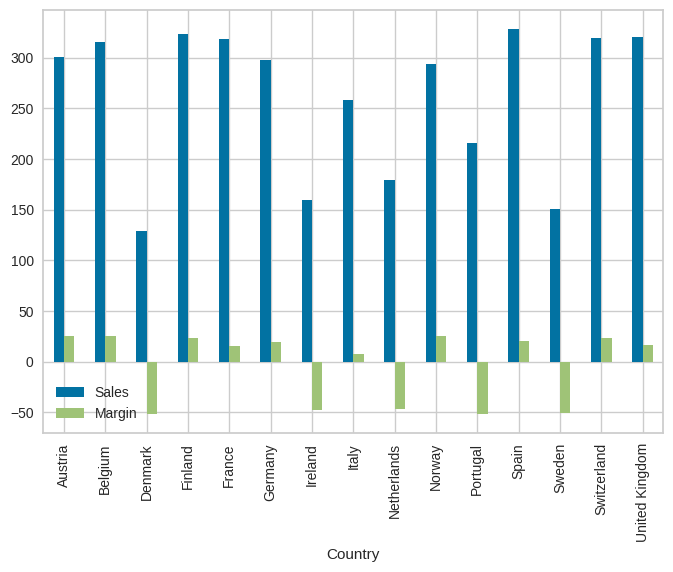

In [ ]:
plt.figure(figsize=(20, 15))
a.plot(kind='bar')


**denmark, Ireland, the Netherlands, Portugal, and Sweden are experiencing negative margins. The countplot analysis indicates that the Netherlands and Sweden have relatively higher quantities of sales, but upon examining their mean sales, it becomes evident that they are considerably low. This suggests that in their efforts to increase order quantity, these countries have compromised their selling prices.**

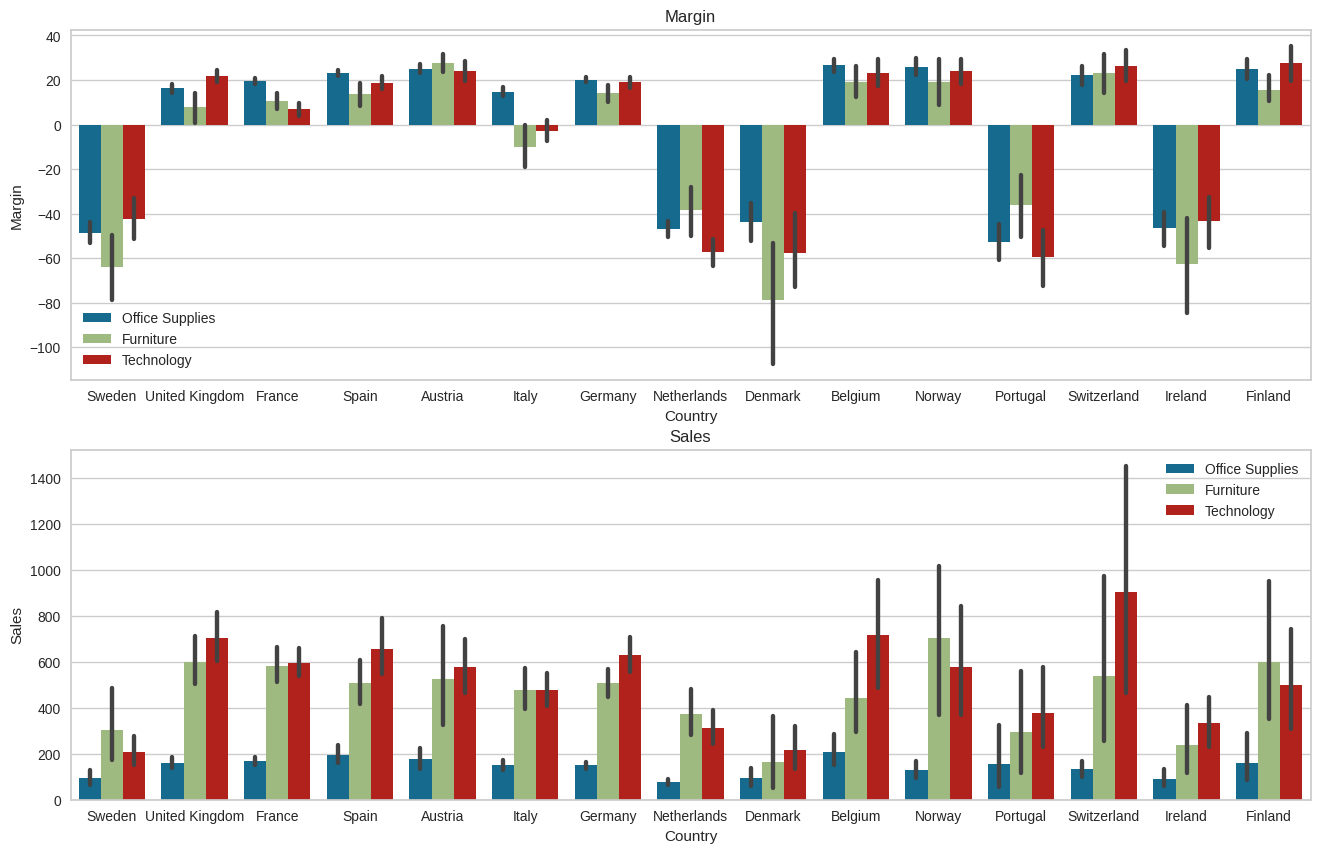

In [ ]:
plt.figure(figsize=(16, 10))  # Set the size of the entire figure

# First subplot (left side)
plt.subplot(2, 1,1)
sns.barplot(data=df, x='Country', y='Margin',hue='Category')
plt.title('Margin')
plt.legend()

# Second subplot (right side)
plt.subplot(2,1, 2)
sns.barplot(data=df, x='Country', y='Sales',hue='Category')
plt.title('Sales')
plt.legend()
plt.show()


Sweden, Denmark, Portugal, Ireland, and the Netherlands are all
experiencing negative margins across all three categories: office supplies, furniture, and technology.

Among these countries, the furniture category seems to be the most significant contributor to the negative margins in most cases.

The Netherlands is an exception, where the technology category has a higher negative impact on Margins compared to furniture.

Surprisingly, even Italy has recorded negative margins in both technology and furniture; however, it managed to achieve positive margins in the office supplies category.


In [ ]:

df['Month'] = pd.to_datetime(df['Order Date']).dt.strftime('%B')
df['Year'] = pd.to_datetime(df['Order Date']).dt.year



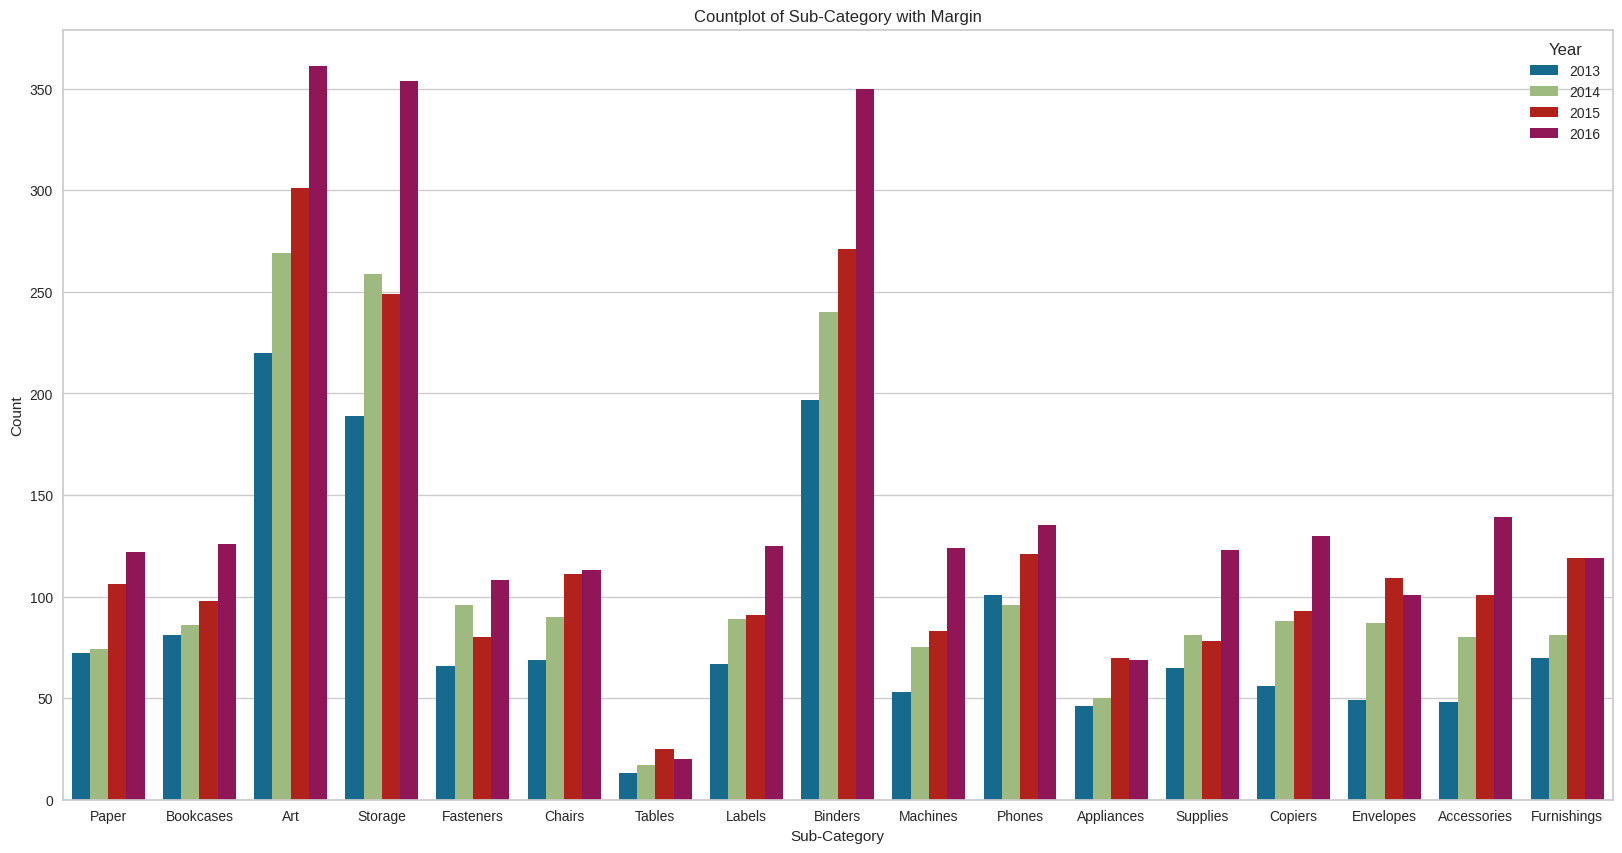

In [ ]:
plt.figure(figsize=(20, 10))

sns.countplot(x='Sub-Category', hue='Year', data=df)
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.title('Countplot of Sub-Category with Margin')
plt.show()



Sales data reveals that art storage and binders have experienced a notable upsurge in their sales count, whereas tables are witnessing comparatively lower sales figures. This discrepancy could potentially be because of  the pricing dynamics.

In [ ]:
df['single Quantity price']= df['Sales']/df['Quantity']

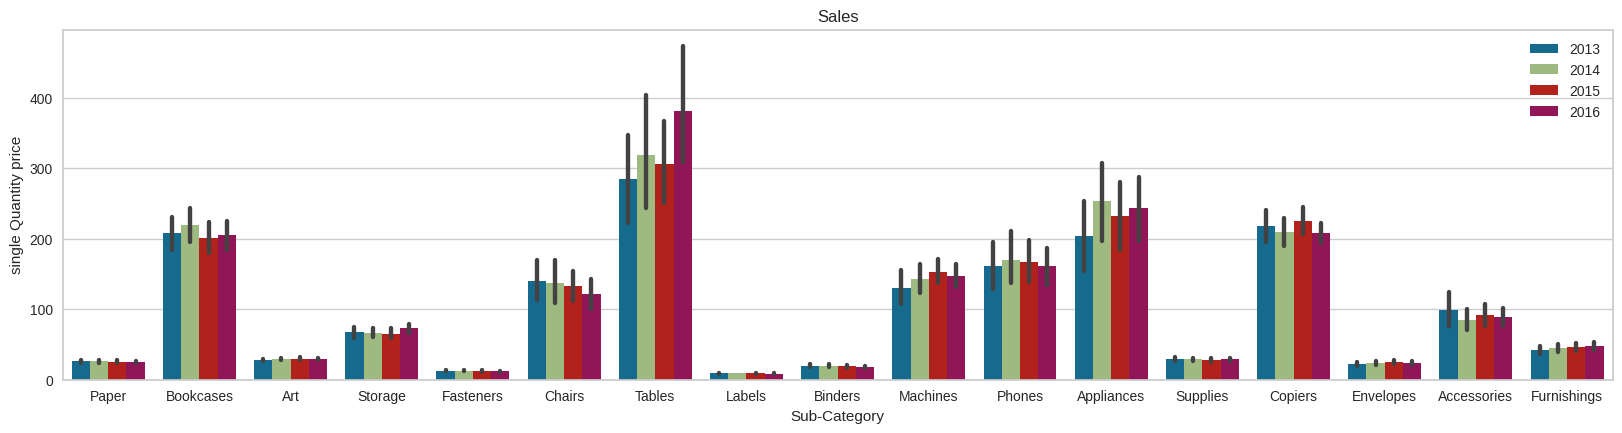

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(2,1, 2)
sns.barplot(data=df,y='single Quantity price',x='Sub-Category',hue='Year')
plt.title('Sales')
plt.legend()
plt.show()

above chart proves that sales count is dependent on sale price

<Axes: xlabel='Sub-Category', ylabel='Sales'>

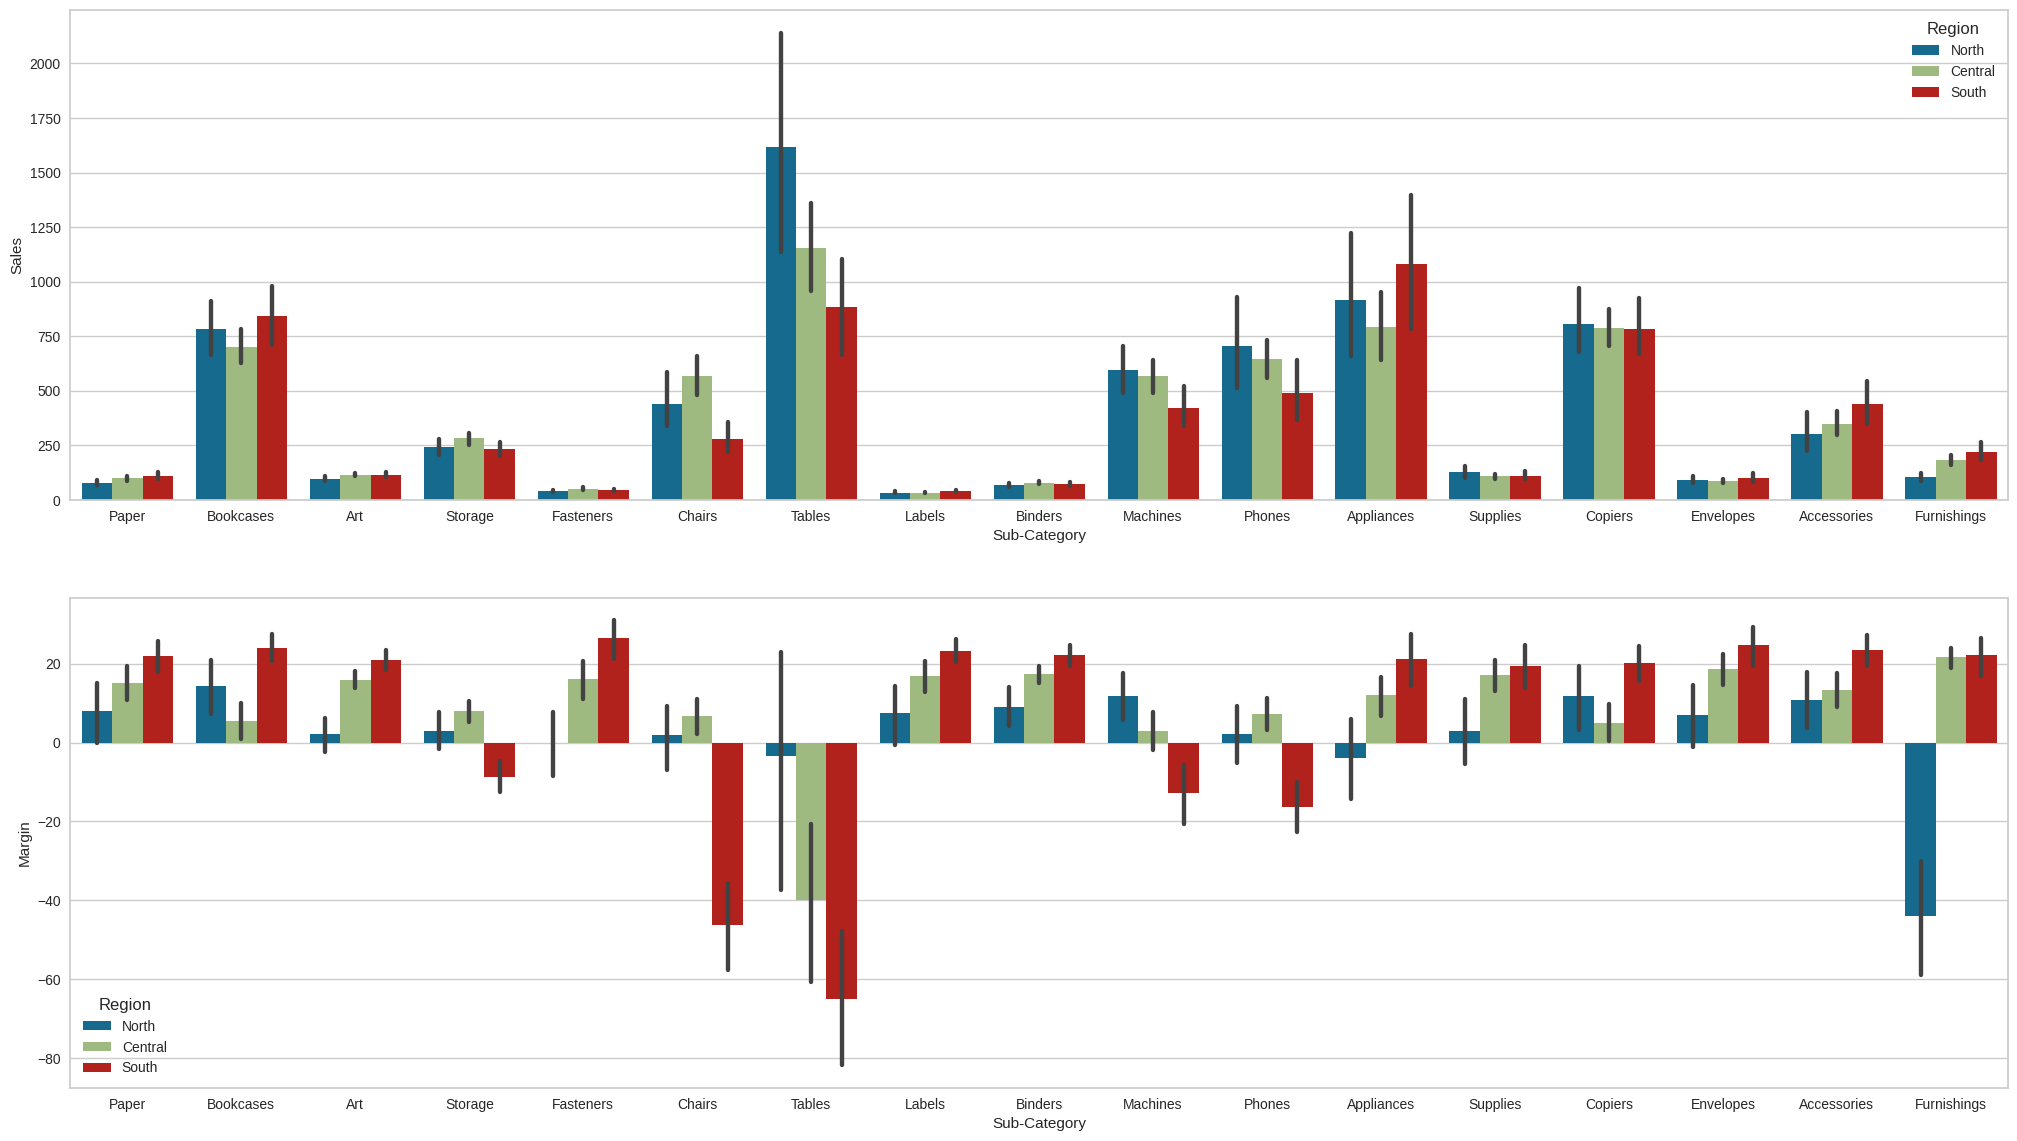

In [ ]:
plt.figure(figsize=(25, 14))
ax= plt.subplot(2,1,2)
sns.barplot(x=df['Sub-Category'], y=df['Margin'],hue= df['Region'])

ax= plt.subplot(2,1,1)
sns.barplot(x=df['Sub-Category'], y=df['Sales'], hue=df['Region'])

In all three regions, North experienced the highest sales of tables. Surprisingly, despite the higher sales, the data indicates that North managed to sell tables at a negative margin, although it was close to achieving positive margins.

On the other hand, the situation was quite different in the Central and South regions. Despite having higher sales of tables, both regions suffered significantly in terms of profits. The data suggests that the margins in these regions were considerably negative, leading to substantial losses even with the higher sales volume.

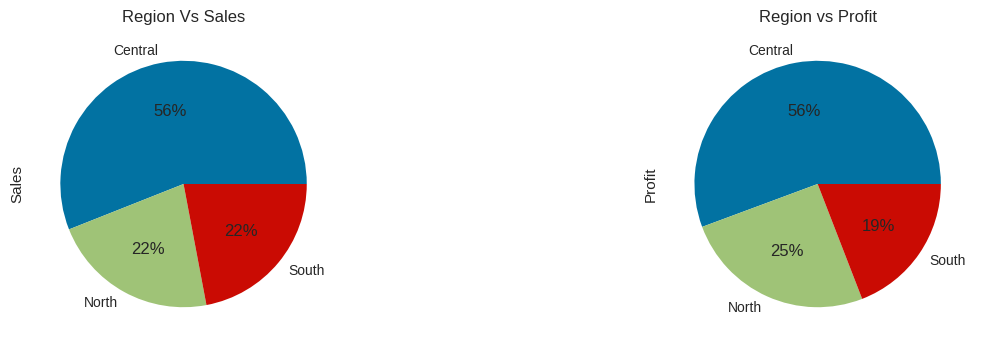

In [ ]:
fig = plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
df.groupby("Region")["Sales"].sum().plot.pie(autopct = "%1.0f%%")
plt.title("Region Vs Sales")
plt.subplot(1, 2, 2)
df.groupby("Region")["Profit"].sum().plot.pie(autopct = "%1.0f%%")
plt.title("Region vs Profit")
plt.show()

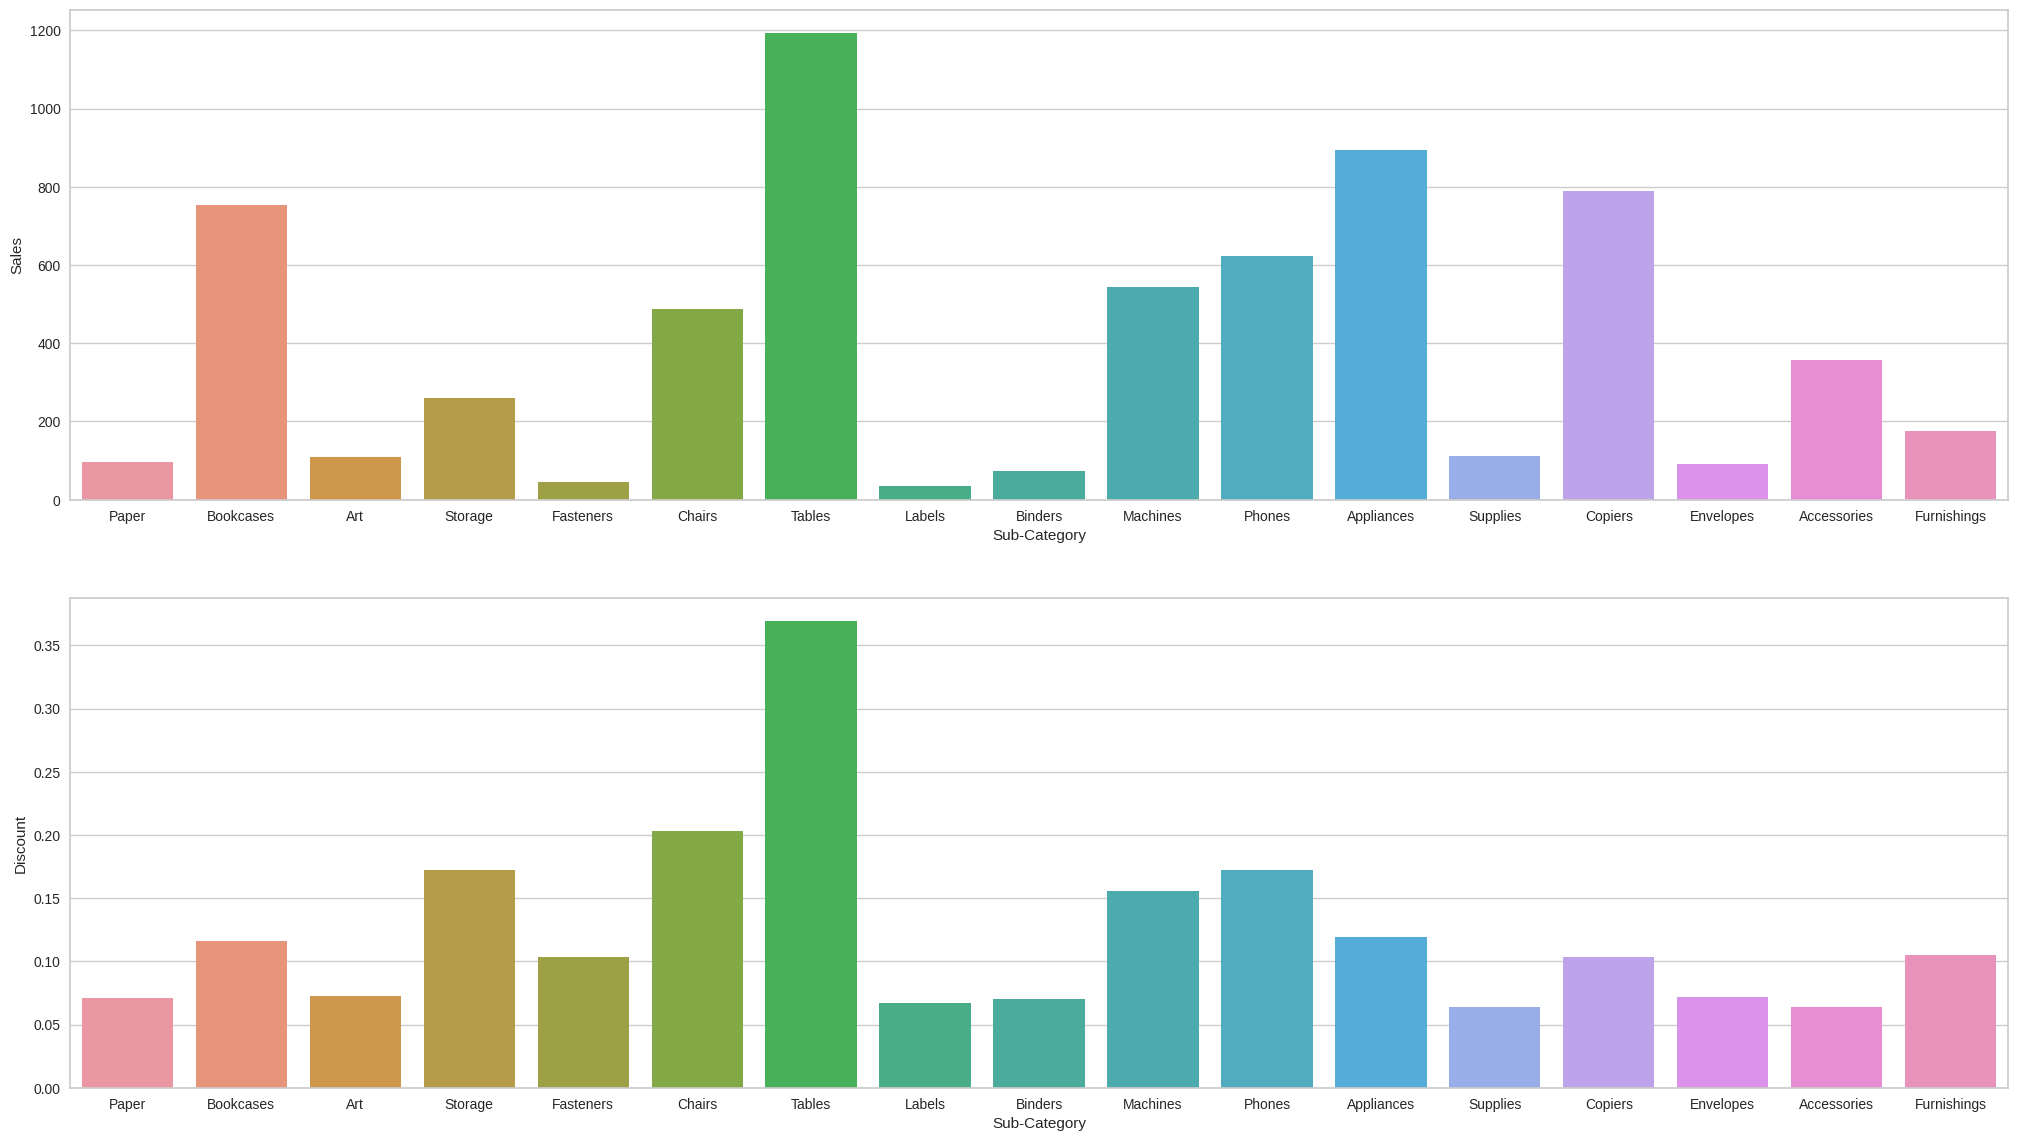

In [ ]:
plt.figure(figsize=(25, 14))
ax=plt.subplot(2,1,1)
sns.barplot(x=df['Sub-Category'], y=df['Sales'],errorbar=None)

ax=plt.subplot(2,1,2)
sns.barplot(x=df['Sub-Category'], y=df['Discount'],errorbar=None)
plt.show()


High discounts boosted sales of tables and chairs. Bookcases, appliances, and copiers saw good sales with 10-15% discounts. However, storage and fasteners struggled to generate significant sales despite offering substantial discounts.

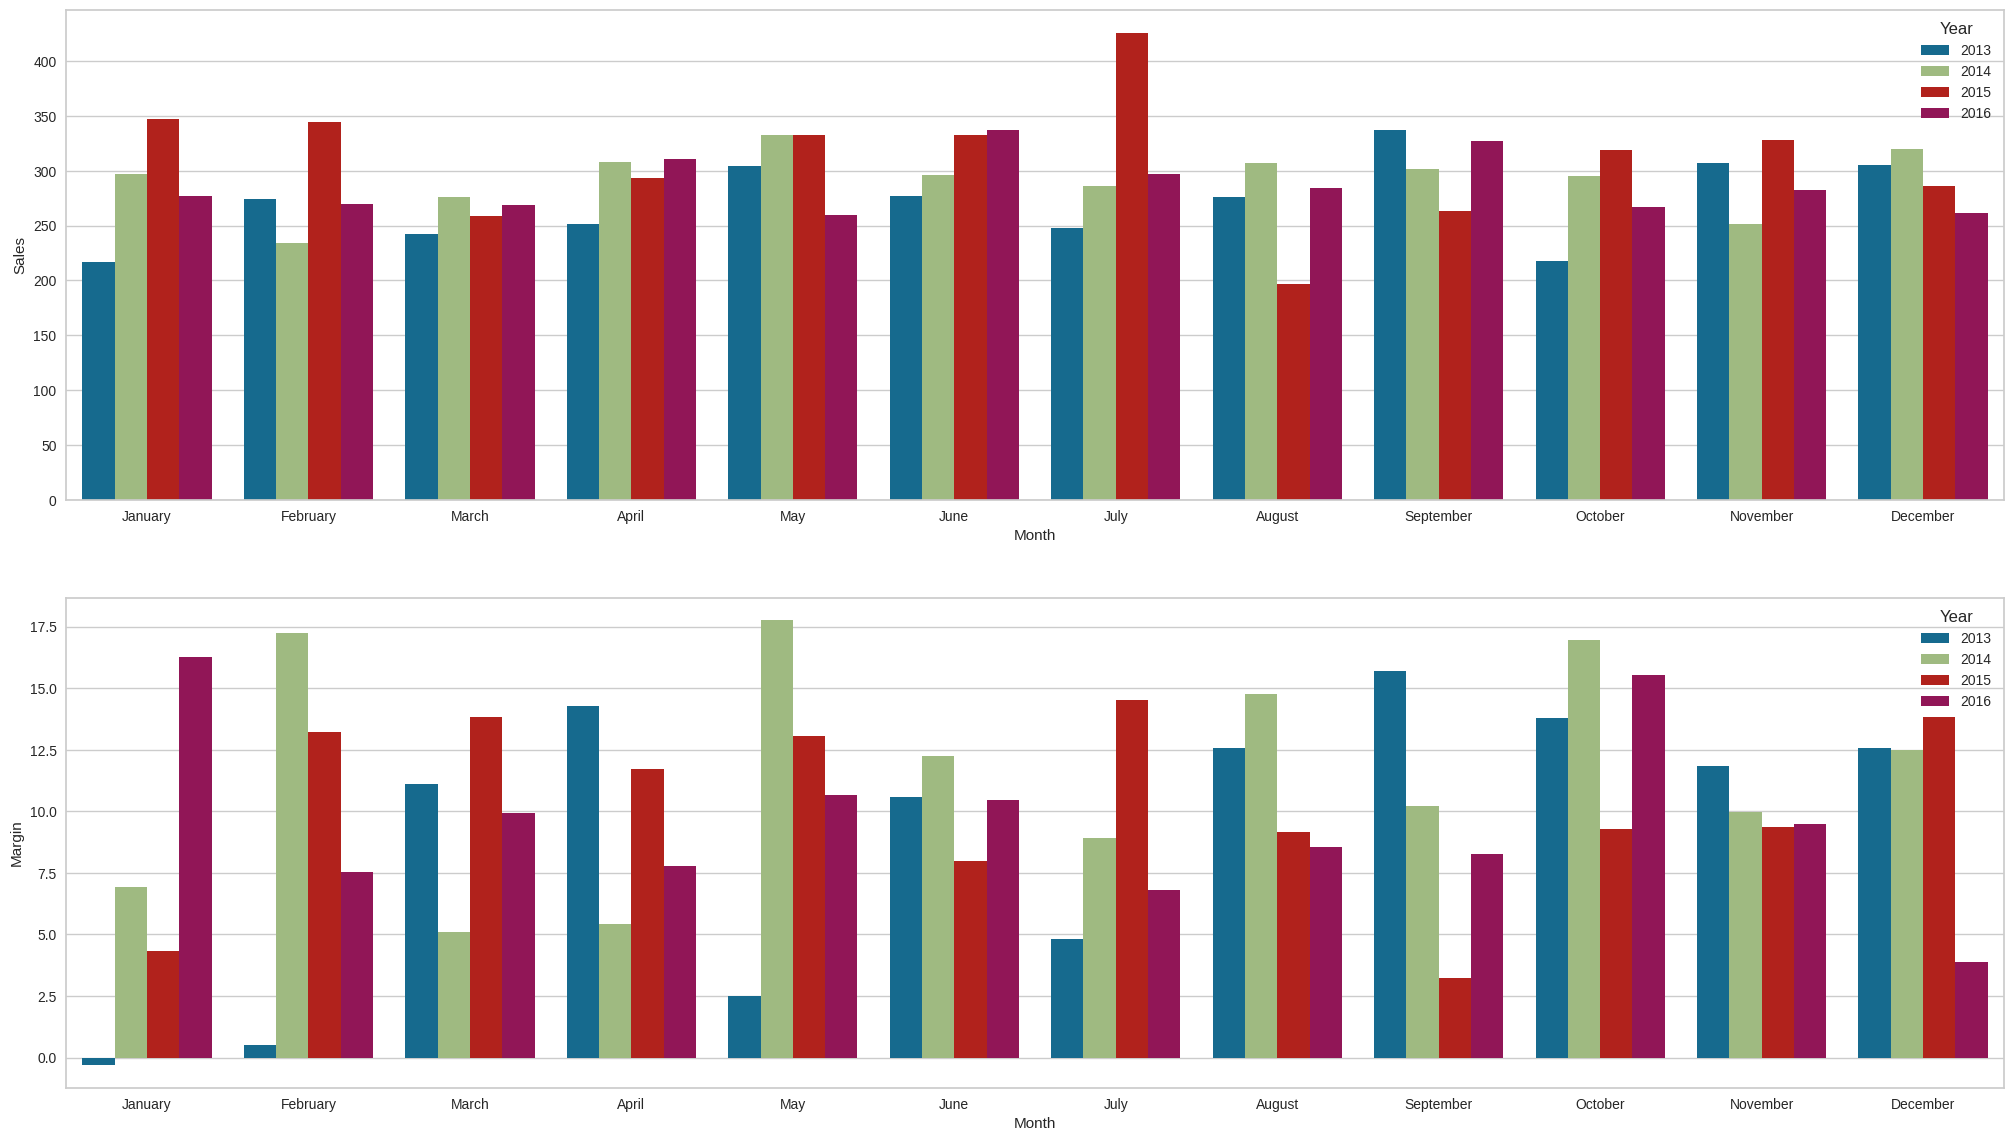

In [ ]:
plt.figure(figsize=(25, 14))
ax=plt.subplot(2,1,1)
sns.barplot(x=df['Month'], y=df['Sales'],hue=df['Year'],errorbar=None)

ax=plt.subplot(2,1,2)
sns.barplot(x=df['Month'], y=df['Margin'],errorbar=None,hue=df['Year'])
plt.show()

lowest margin- january 2013
highest margin-may 2014

In [ ]:
df13=df[df['Year']==2013]
df14=df[df['Year']==2014]
df15=df[df['Year']==2015]
df16=df[df['Year']==2016]

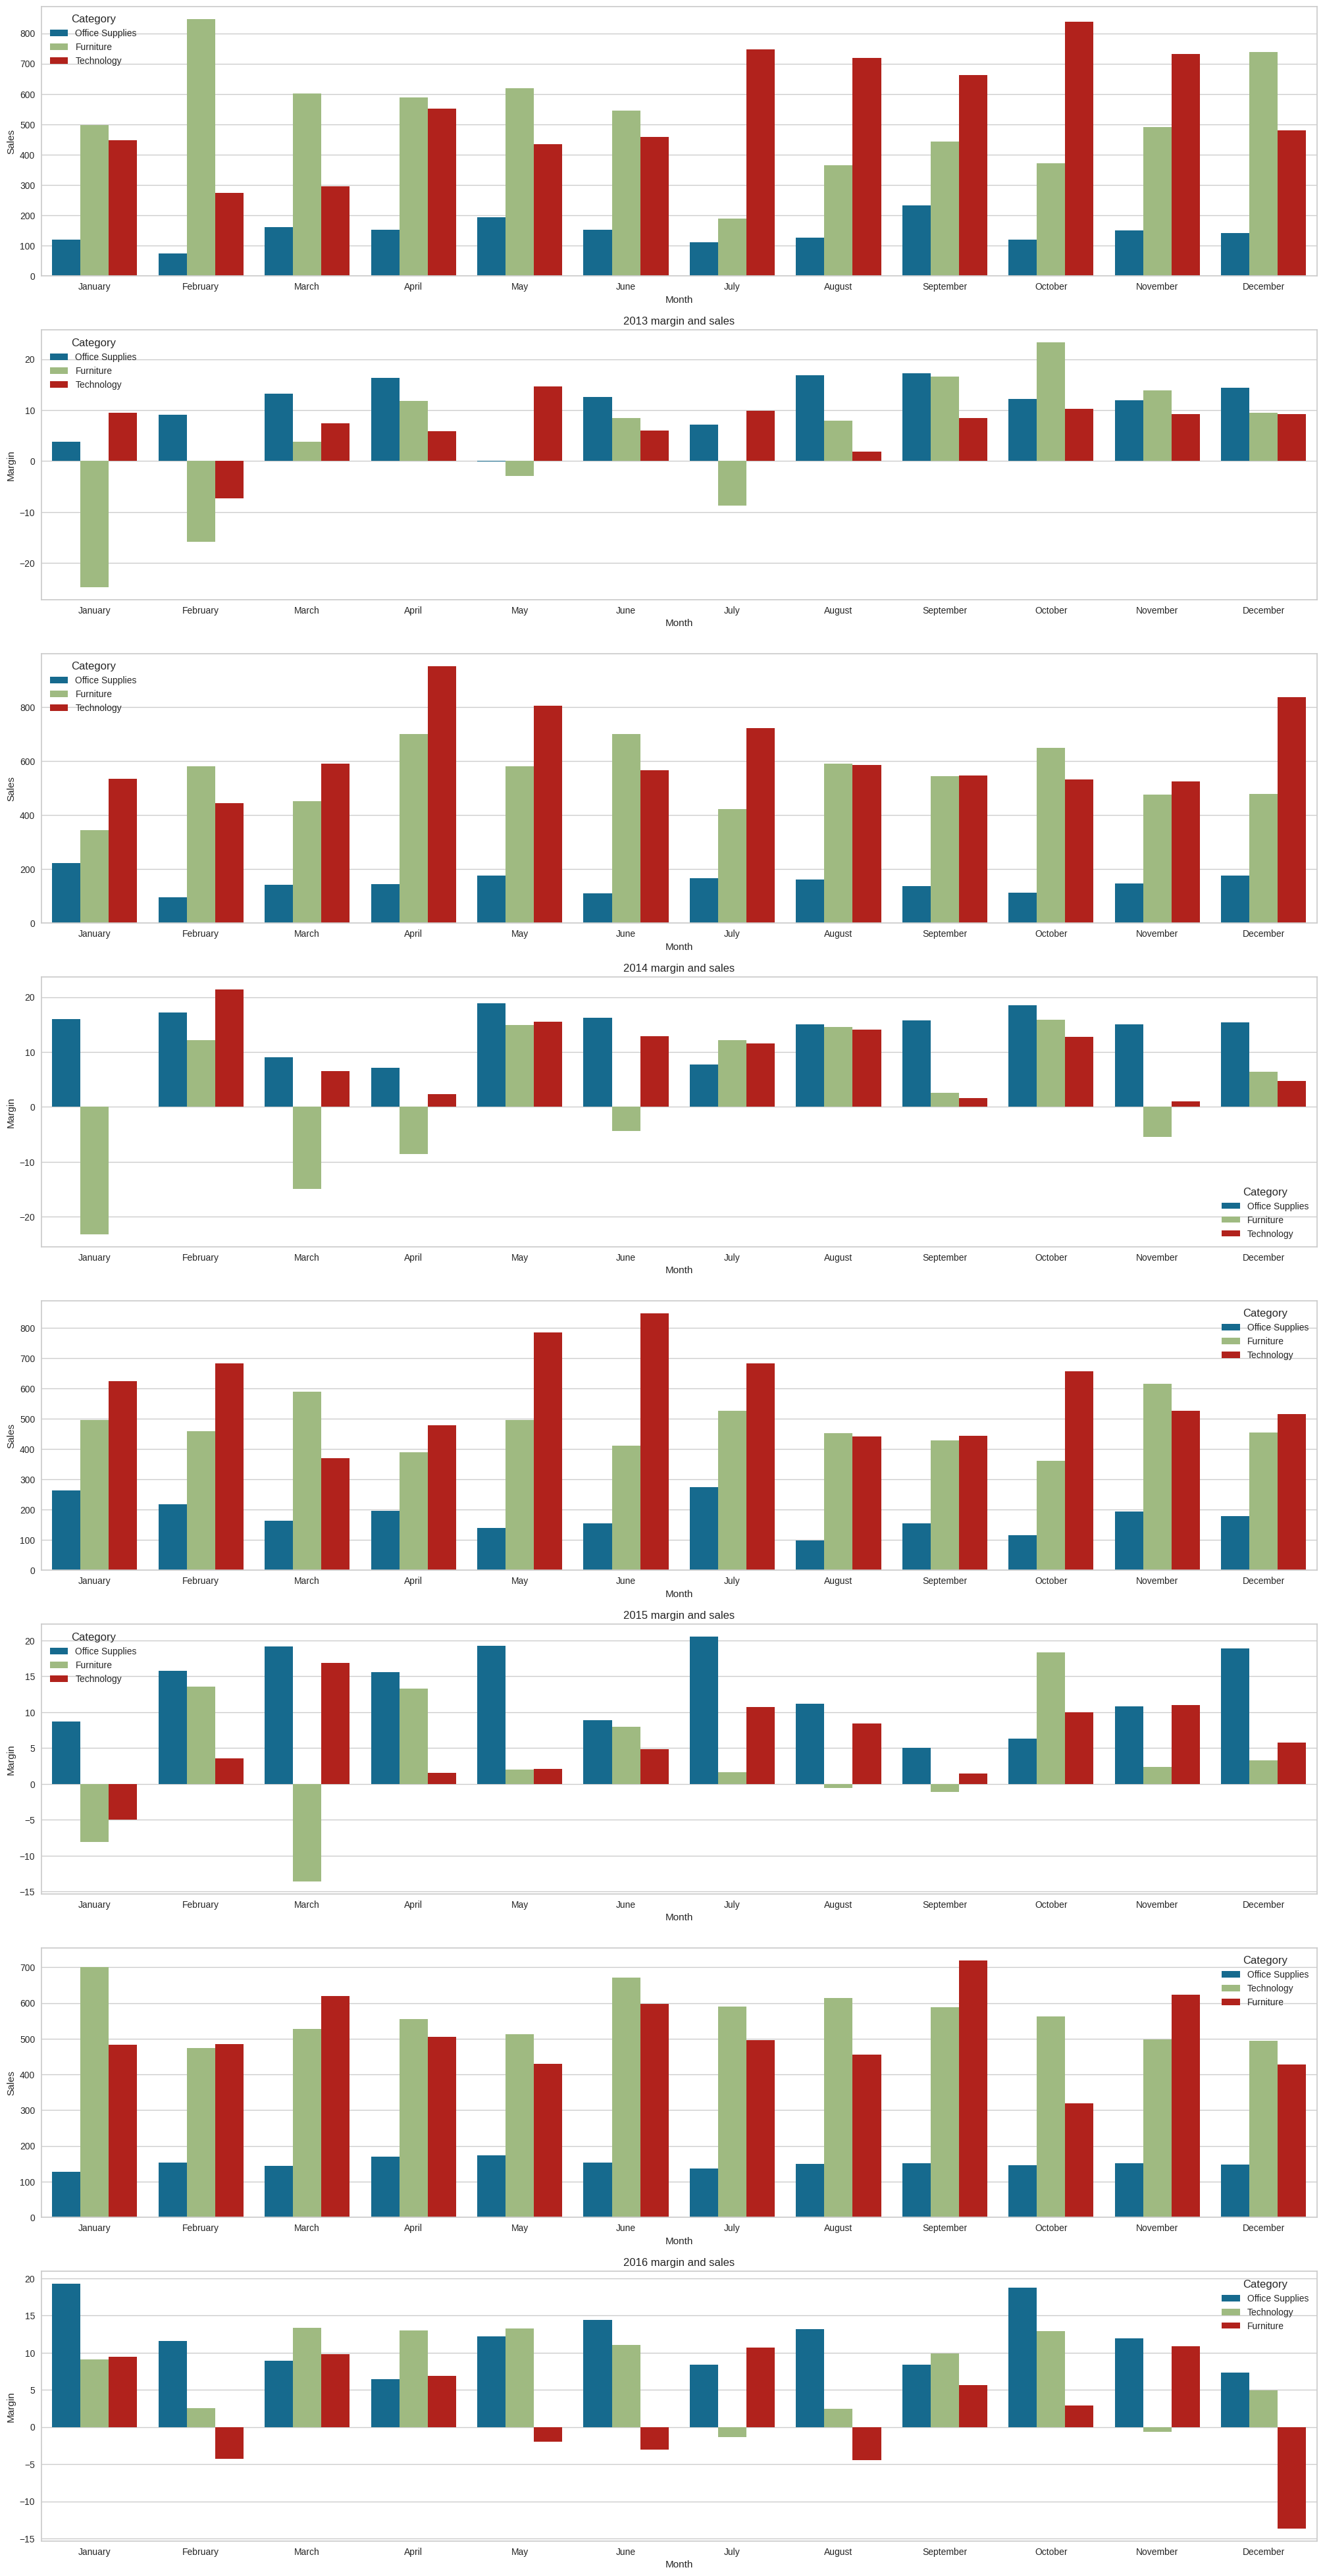

In [ ]:
plt.figure(figsize=(25, 50))


ax = plt.subplot(8, 1, 1)
sns.barplot(x='Month', y='Sales',hue='Category' ,data=df13, errorbar=None)
ax = plt.subplot(8, 1, 2)
sns.barplot(x='Month', y='Margin', hue= 'Category',  data=df13, errorbar=None)
plt.title('2013 margin and sales')


ax = plt.subplot(8, 1, 3)
sns.barplot(x='Month', y='Sales',hue='Category' ,data=df14, errorbar=None)

ax = plt.subplot(8, 1, 4)
sns.barplot(x='Month', y='Margin', hue= 'Category',  data=df14, errorbar=None)
plt.title('2014 margin and sales')

ax = plt.subplot(8, 1, 5)
sns.barplot(x='Month', y='Sales',hue='Category' ,data=df15, errorbar=None)
ax = plt.subplot(8, 1, 6)
sns.barplot(x='Month', y='Margin', hue= 'Category',  data=df15, errorbar=None)
plt.title('2015 margin and sales')


ax = plt.subplot(8, 1, 7)
sns.barplot(x='Month', y='Sales',hue='Category' ,data=df16, errorbar=None)
ax = plt.subplot(8, 1, 8)
sns.barplot(x='Month', y='Margin', hue= 'Category',  data=df16, errorbar=None)
plt.title('2016 margin and sales')
plt.show()


In 2013, negative margins were observed in January, March, and April, specifically in the furniture category.

In 2014, negative margins occurred in January, March, April, June, and November, also in the furniture category.

In 2015, negative margins were recorded in January and March, with very low negative margins in August and September, still within the furniture category.

In 2016, negative margins were observed in February, May, June, and December, again in the furniture category.

The negative margins seem to occur intermittently throughout each year, with specific months being more prone to experiencing these challenges.
This suggests that there might be seasonality or cyclical factors influencing the furniture sales and profitability.

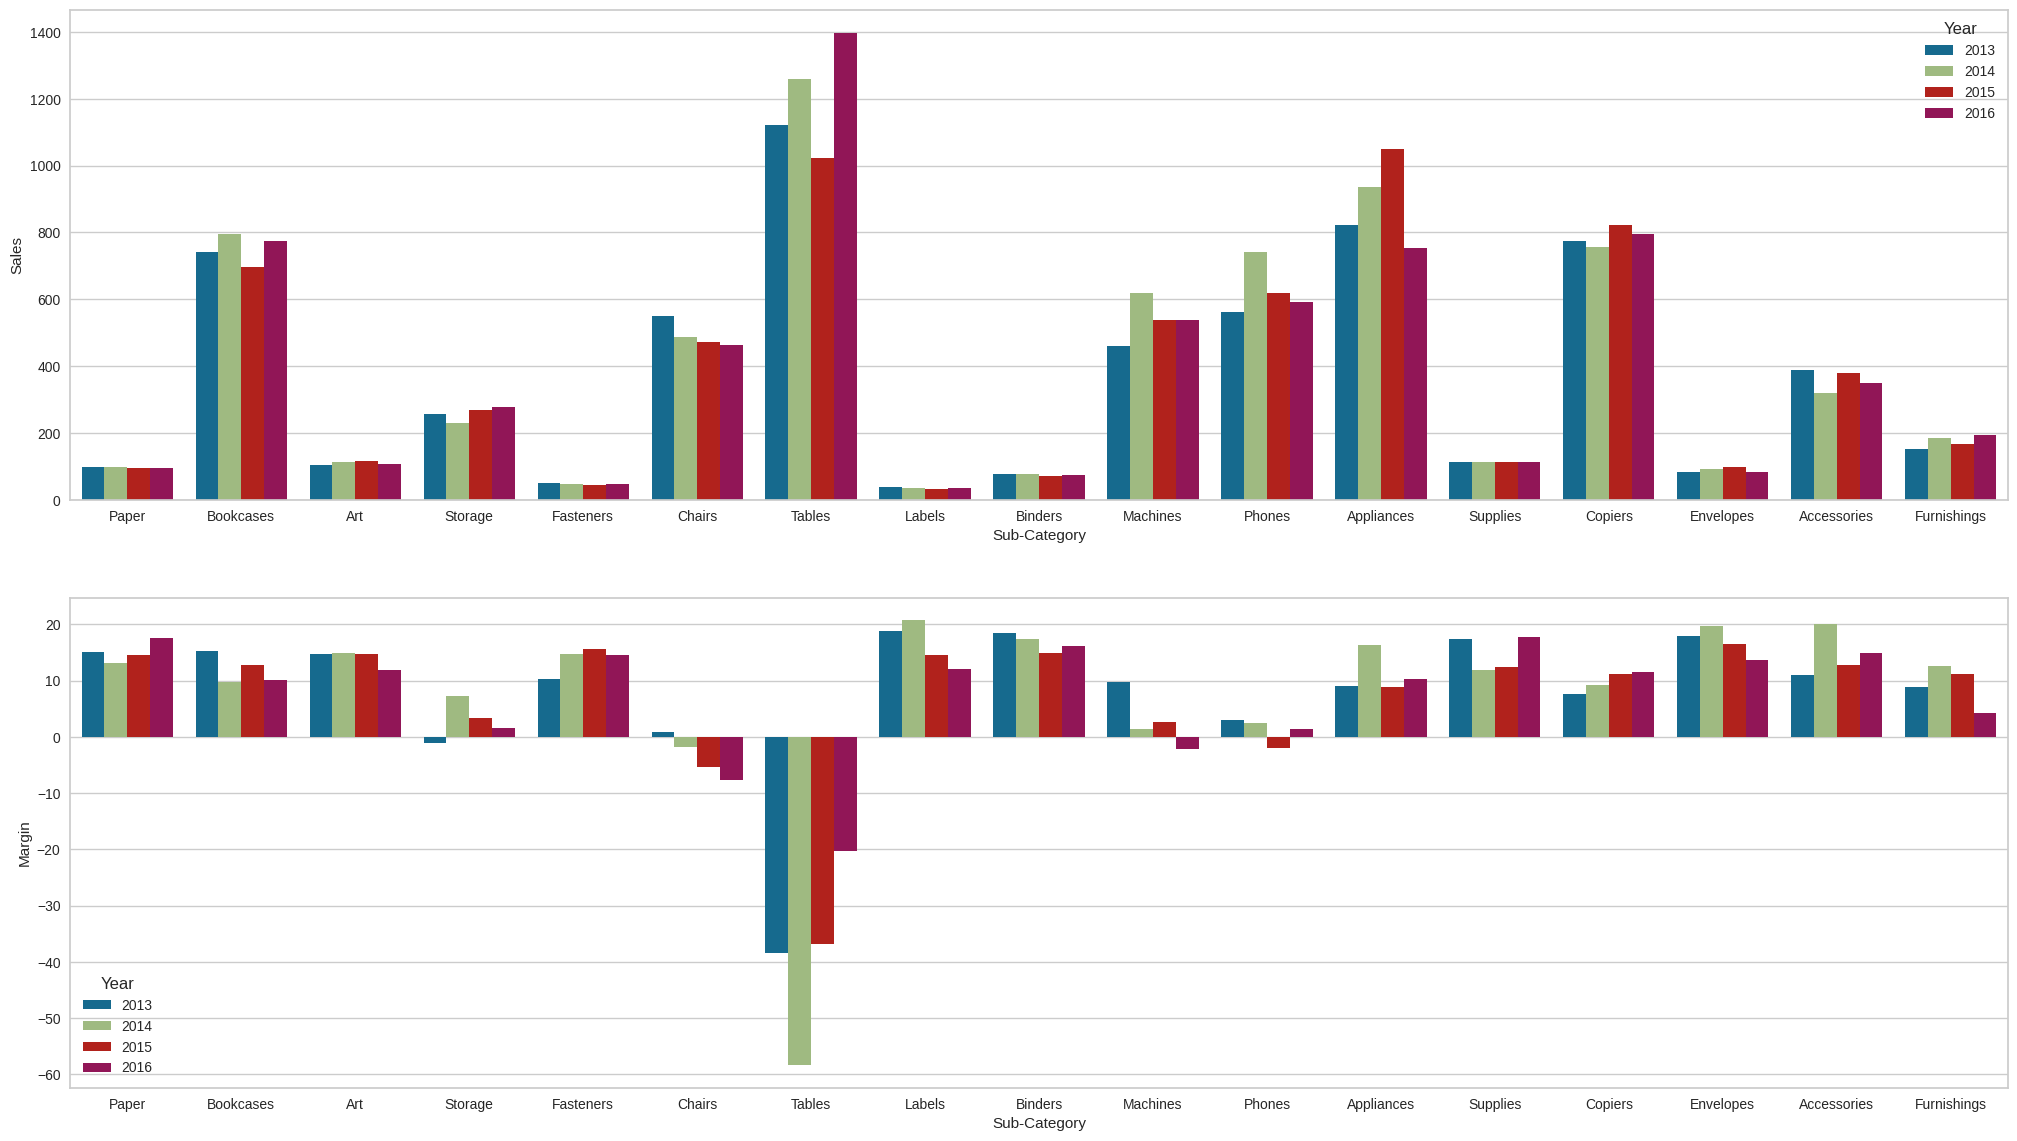

In [ ]:
plt.figure(figsize=(25, 14))

# Subplot 1: Sales with hue based on both Year and Category
ax = plt.subplot(2, 1, 1)
sns.barplot(x='Sub-Category', y='Sales',hue='Year' ,data=df, errorbar=None)

# Subplot 2: Margin with hue based on both Year and Category
ax = plt.subplot(2, 1, 2)
sns.barplot(x='Sub-Category', y='Margin', hue= 'Year',  data=df, errorbar=None)

plt.show()

The chart demonstrates that the tables category has significantly improved its margins over time. In 2014, the margins were very poor, but there has been a remarkable reversal since then. The improved margins have been accompanied by a notable increase in sales figures, indicating a positive correlation between margin improvement and sales volume growth.


On the other hand, the chairs segment has been experiencing a negative trend in margins year after year. In 2013, margins were positive, but they gradually decreased in subsequent years.However sales volume are also increasing see countplot chart below

Text(0.5, 1.0, 'Countplot for Chairs')

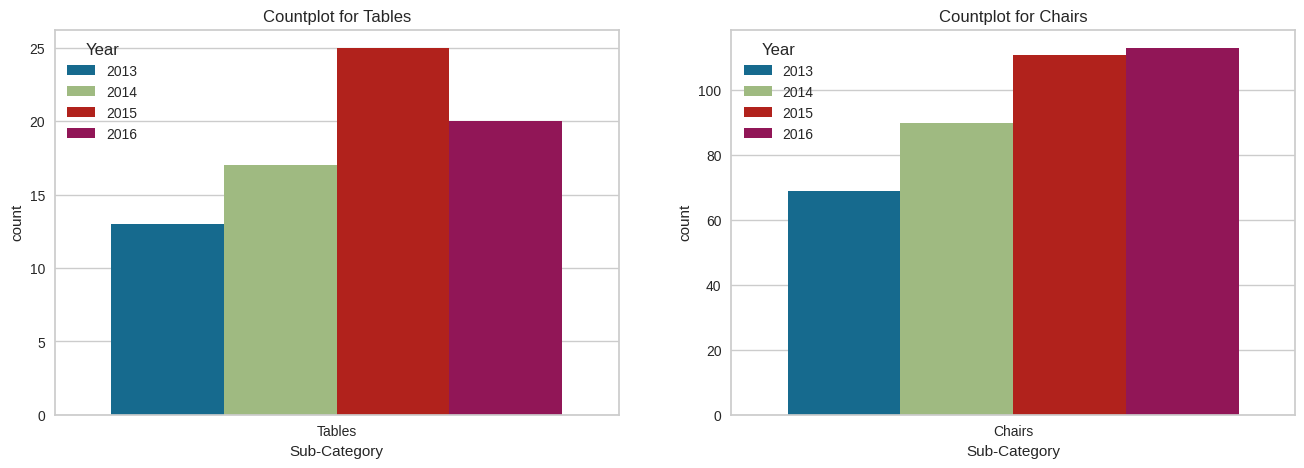

In [ ]:
plt.figure(figsize=(16, 5))

ax=plt.subplot(1,2,1)
sns.countplot(x='Sub-Category', data=df[df['Sub-Category'] == 'Tables'],hue='Year')
plt.title('Countplot for Tables')

ax=plt.subplot(1,2,2)
sns.countplot(x='Sub-Category', data=df[df['Sub-Category'] == 'Chairs'],hue='Year')
plt.title('Countplot for Chairs')

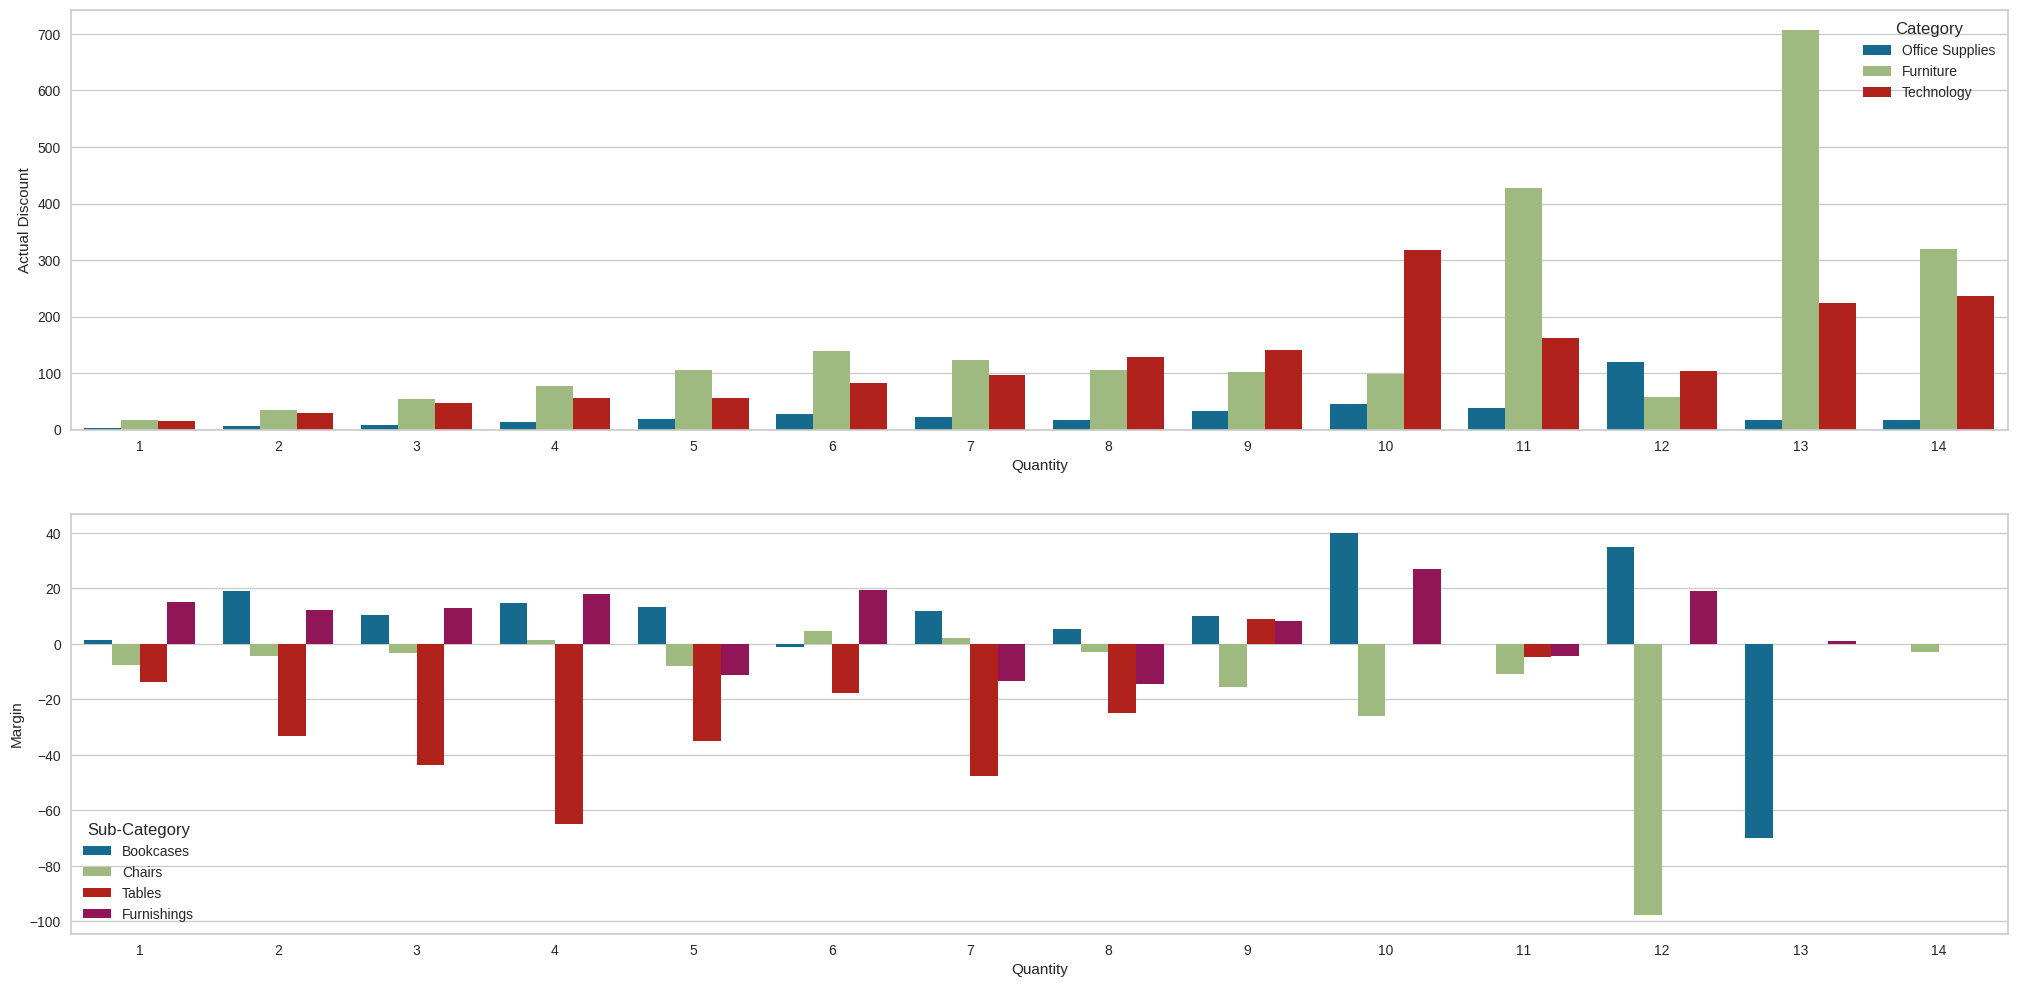

In [ ]:
plt.figure(figsize=(25, 12))

ax = plt.subplot(2, 1, 1)
sns.barplot(x='Quantity', y='Actual Discount',hue='Category',data=df, errorbar=None)

ax = plt.subplot(2, 1, 2)
sns.barplot(x='Quantity', y='Margin',hue='Sub-Category',data=df[df['Category'] == 'Furniture'], errorbar=None)
plt.show()

In [ ]:
df['Sub-Category'].value_counts()

Art            1151
Binders        1058
Storage        1051
Phones          453
Bookcases       391
Furnishings     389
Chairs          383
Paper           374
Labels          372
Accessories     368
Copiers         367
Fasteners       350
Supplies        347
Envelopes       346
Machines        335
Appliances      235
Tables           75
Name: Sub-Category, dtype: int64

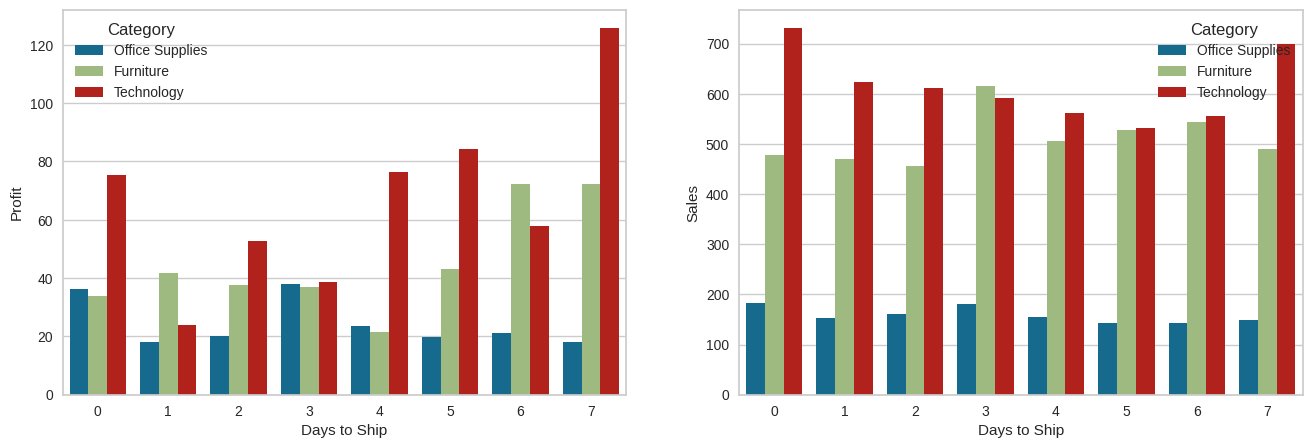

In [ ]:
plt.figure(figsize=(16, 5))


ax=plt.subplot(1,2,1)
sns.barplot(x='Days to Ship', y='Profit',hue='Category' , data=df, errorbar=None)

ax=plt.subplot(1,2,2)
sns.barplot(x='Days to Ship', y='Sales',hue='Category' , data=df, errorbar=None)
plt.show()

In [ ]:
df['State'].value_counts()

England                       1187
Ile-de-France                  673
North Rhine-Westphalia         572
Provence-Alpes-Côte d'Azur     250
Madrid                         198
                              ... 
Södermanland                     1
Zeeland                          1
Aveiro                           1
Extremadura                      1
Setúbal                          1
Name: State, Length: 127, dtype: int64

<Axes: xlabel='City,Country'>

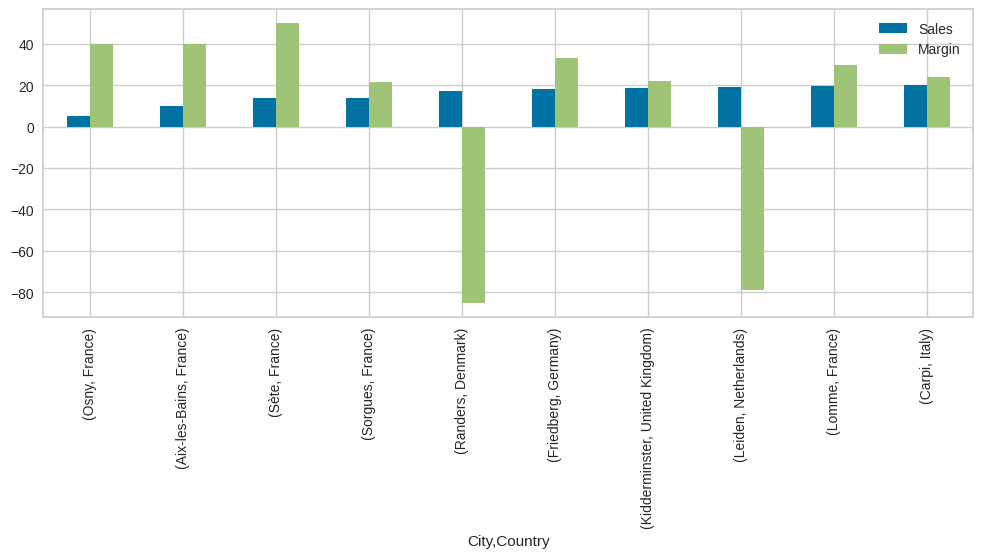

In [ ]:
top10cities=df.groupby(['City','Country'])[['Sales','Margin']].mean()
top10cities=top10cities.sort_values(by='Sales',ascending=False)
top10cities= top10cities.head(10)

bottom10cities=df.groupby(['City','Country'])[['Sales','Margin']].mean()
bottom10cities=bottom10cities.sort_values(by='Sales',ascending=True)
bottom10cities= bottom10cities.head(10)

bottom10cities.plot(kind='bar', y=['Sales', 'Margin'], figsize=(12, 4))



<Axes: xlabel='City,Country'>

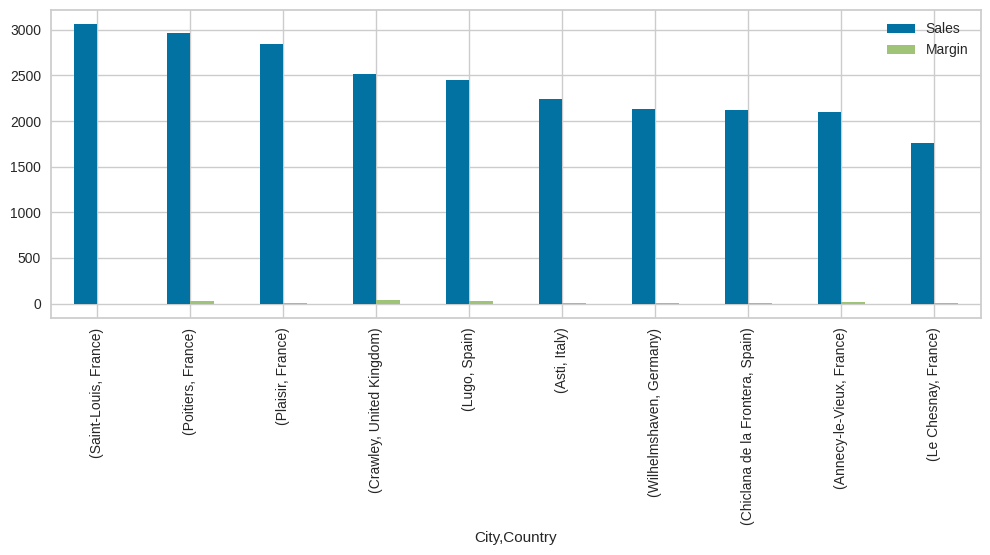

In [ ]:
top10cities.plot(kind='bar', y=['Sales', 'Margin'], figsize=(12, 4))

<Axes: xlabel='Customer Name'>

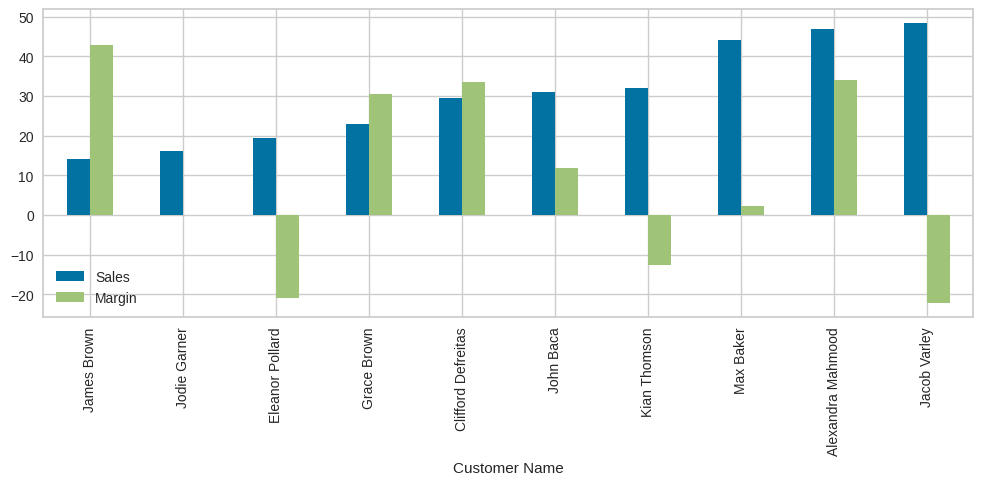

In [ ]:
top10clients=df.groupby(['Customer Name'])[['Sales','Margin']].mean()
top10clients=top10clients.sort_values(by='Sales',ascending=False)
top10clients= top10clients.head(10)

bottom10clients=df.groupby(['Customer Name'])[['Sales','Margin']].mean()
bottom10clients=bottom10clients.sort_values(by='Sales',ascending=True)
bottom10clients= bottom10clients.head(10)

bottom10clients.plot(kind='bar', y=['Sales', 'Margin'], figsize=(12, 4))


 the bottom 10 clients, even though they buy less, are helping us make more profit because they're buying expensive things or services that give us a lot of profit.  
 Eleanor, Kiab, and Jacob got big discounts but didn't buy much.

On the other hand, the top 10 clients are buying a lot, which makes our overall sales look good, but they're buying things that don't give us as much profit each time. However, since they buy so much, their total impact on our sales is big.

<Axes: xlabel='Customer Name'>

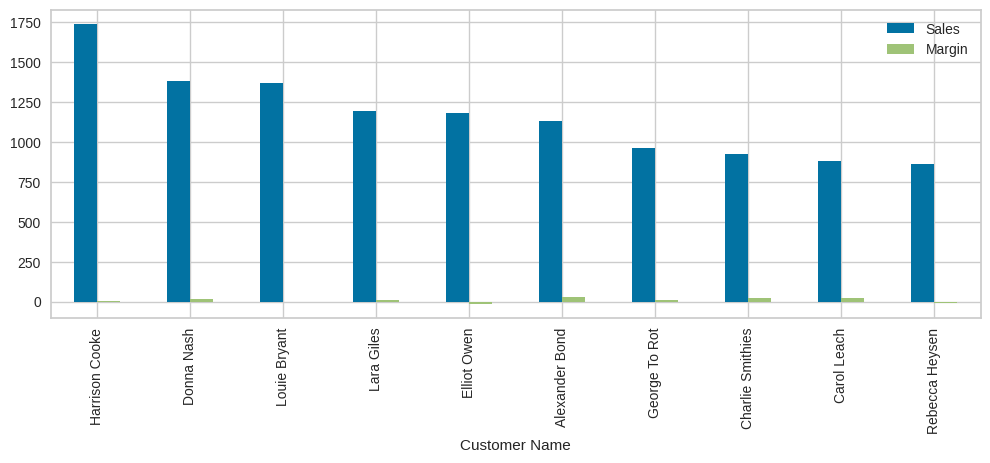

In [ ]:
top10clients.plot(kind='bar', y=['Sales', 'Margin'], figsize=(12, 4))


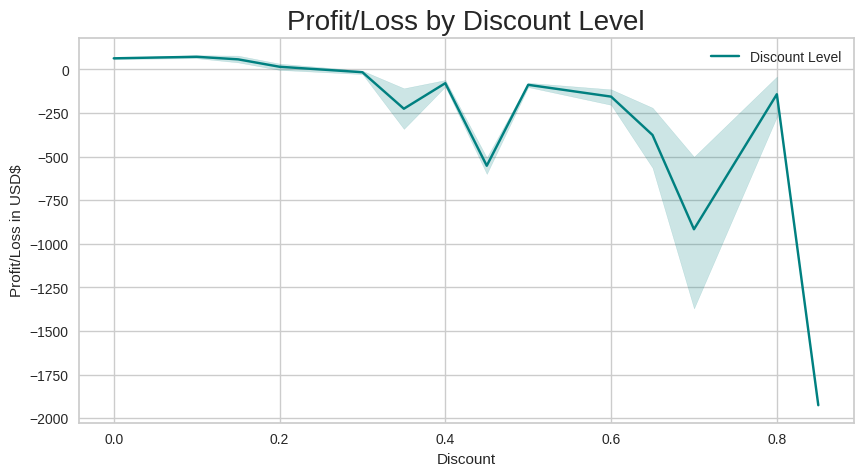

In [ ]:
plt.figure(figsize = (10, 5))
# profit/loss by Discount level
sns.lineplot(x='Discount', y= 'Profit', data = df, color = 'Teal', label = 'Discount Level')
plt.ylabel('Profit/Loss in USD$')
plt.title('Profit/Loss by Discount Level', fontsize = 20)
plt.show()

<Axes: >

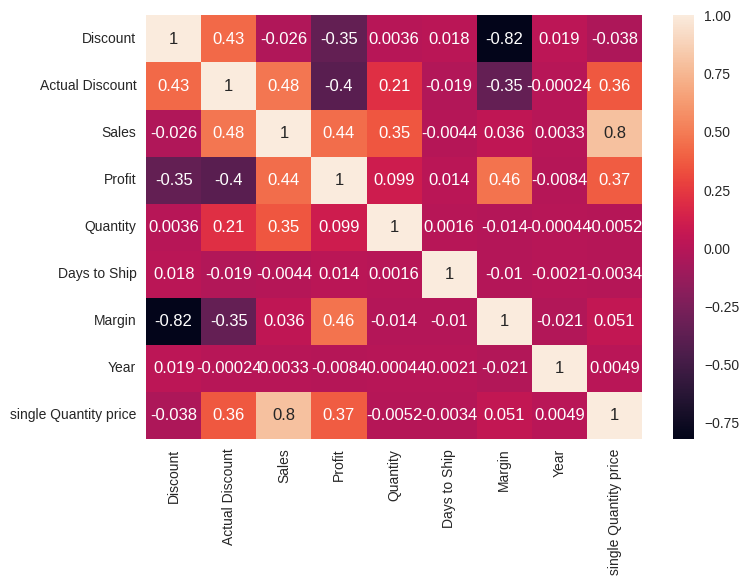

In [ ]:
corr=df.corr()

sns.heatmap(corr,annot= True)

In [ ]:
df.columns

Index(['Order ID', 'Product Name', 'Discount', 'Actual Discount', 'Sales',
       'Profit', 'Quantity', 'Category', 'Sub-Category', 'Order Date',
       'Customer Name', 'City', 'Country', 'Region', 'Segment', 'Ship Date',
       'Ship Mode', 'State', 'Days to Ship', 'Margin', 'Month', 'Year',
       'single Quantity price'],
      dtype='object')

In [ ]:
df.drop(['Margin','Year','Month','Customer Name','Order ID','Order Date','Ship Date','single Quantity price'],axis=1,inplace= True)

In [ ]:
dfif= df.select_dtypes(include=['int','float'])

In [ ]:
dfif.dtypes

Discount           float64
Actual Discount    float64
Sales                int64
Profit               int64
Quantity             int64
Days to Ship         int64
dtype: object

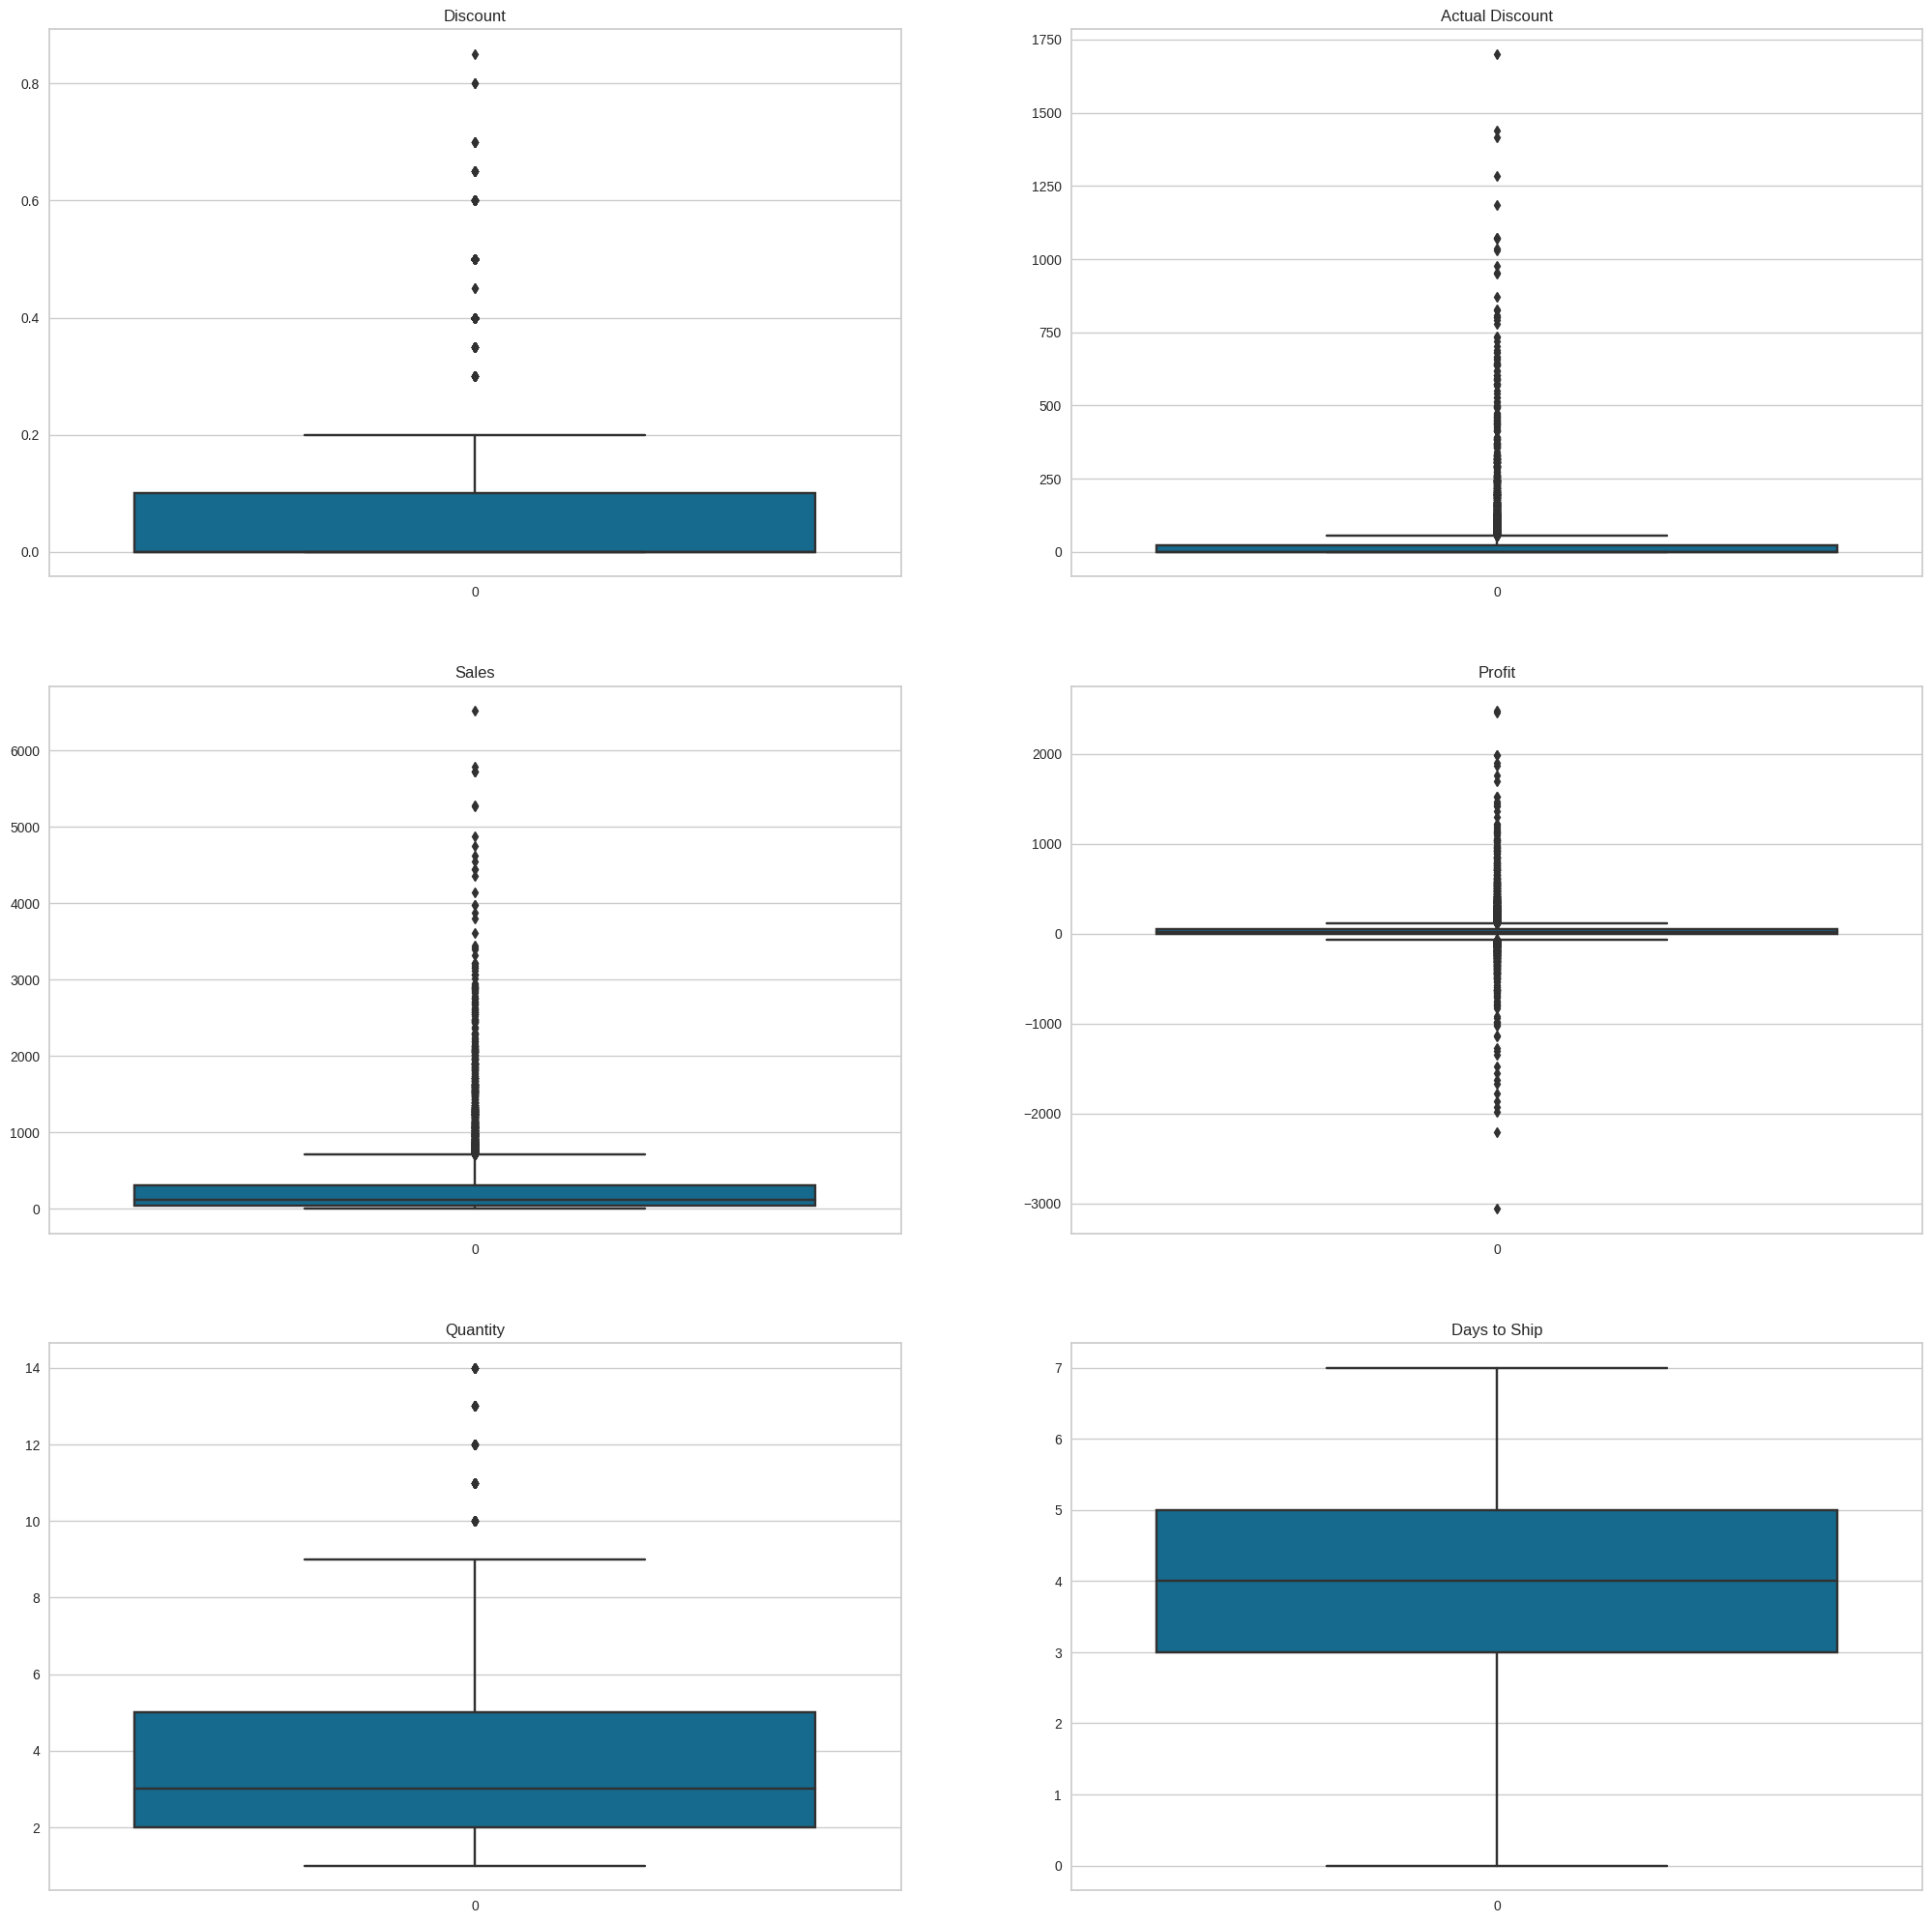

In [ ]:
x=0
plt.figure(figsize=(25,25))
for i in dfif.columns:
  ax= plt.subplot(321+x)
  sns.boxplot(dfif[i])
  plt.title(i)
  x+=1

In [ ]:
df.describe(percentiles=[0.005,0.01,0.02,0.03,0.95,0.98,0.99,0.996,0.997,0.998,0.999]).T

,count,mean,std,min,0.5%,1%,2%,3%,50%,95%,98%,99%,99.6%,99.7%,99.8%,99.9%,max
Discount,8045.0,0.110075,0.181787,0.0,0.00,0.0,0.00,0.0,0.0,0.5,0.500,0.600,0.600,0.6000,0.6500,0.700,0.85
Actual Discount,8045.0,29.800485,88.827454,0.0,0.00,0.0,0.00,0.0,0.0,147.8,291.512,437.456,646.208,702.3916,807.0336,1035.214,1700.00
Sales,8045.0,291.903170,485.258616,3.0,7.22,9.0,11.88,14.0,117.0,1200.0,1860.480,2456.560,3063.000,3220.8680,3969.6720,4742.280,6517.00
Profit,8045.0,35.202237,178.147747,-3060.0,-626.34,-398.0,-240.12,-158.0,14.0,241.0,448.240,701.000,1018.296,1109.6240,1219.6480,1527.560,2476.00
Quantity,8045.0,3.772281,2.203610,1.0,1.00,1.0,1.00,1.0,3.0,8.0,9.000,11.000,13.000,13.0000,14.0000,14.000,14.00
Days to Ship,8045.0,4.006588,1.740808,0.0,0.00,0.0,0.00,0.0,4.0,7.0,7.000,7.000,7.000,7.0000,7.0000,7.000,7.00


In [ ]:
print(df[df['Discount']>0.6500].shape)
print(df[df['Sales']>3220.8680].shape)
print(df[df['Profit']>1219.6480].shape)
print(df[df['Profit']<-626.34].shape)

(10, 15)
(25, 15)
(17, 15)
(41, 15)


In [ ]:
df['Sales'] = np.where(df['Sales'] > 3220.8680,3220.8680, df['Sales'])
df['Profit'] = np.where(df['Profit']>1219.6480, 1219.6480, df['Profit'])
df['Profit'] = np.where(df['Profit']<-626.34, -626.34, df['Profit'])
df['Discount'] = np.where(df['Discount'] >0.6500,0.6500	, df['Discount'])


In [ ]:
df.describe(percentiles=[0.005,0.01,0.02,0.03,0.95,0.98,0.99,0.996,0.997,0.998,0.999]).T

,count,mean,std,min,0.5%,1%,2%,3%,50%,95%,98%,99%,99.6%,99.7%,99.8%,99.9%,max
Discount,8045.0,0.109956,0.181394,0.00,0.0000,0.0,0.00,0.0,0.0,0.5,0.500,0.600,0.600,0.600000,0.650000,0.650,0.650
Actual Discount,8045.0,29.800485,88.827454,0.00,0.0000,0.0,0.00,0.0,0.0,147.8,291.512,437.456,646.208,702.391600,807.033600,1035.214,1700.000
Sales,8045.0,287.956085,452.513053,3.00,7.2200,9.0,11.88,14.0,117.0,1200.0,1860.480,2456.560,3063.000,3220.753424,3220.868000,3220.868,3220.868
Profit,8045.0,36.677076,150.446532,-626.34,-625.8252,-398.0,-240.12,-158.0,14.0,241.0,448.240,701.000,1018.296,1109.624000,1219.326976,1219.648,1219.648
Quantity,8045.0,3.772281,2.203610,1.00,1.0000,1.0,1.00,1.0,3.0,8.0,9.000,11.000,13.000,13.000000,14.000000,14.000,14.000
Days to Ship,8045.0,4.006588,1.740808,0.00,0.0000,0.0,0.00,0.0,4.0,7.0,7.000,7.000,7.000,7.000000,7.000000,7.000,7.000


In [ ]:
df['Product Name'].value_counts()

Eldon File Cart, Single Width              26
Rogers File Cart, Single Width             23
Stanley Pencil Sharpener, Water Color      22
Sanford Pencil Sharpener, Water Color      22
Avery Index Tab, Clear                     21
                                           ..
Kleencut Shears, Easy Grip                  1
Rubbermaid Frame, Black                     1
Lesro Training Table, Adjustable Height     1
Eaton Parchment Paper, Multicolor           1
Panasonic Card Printer, Red                 1
Name: Product Name, Length: 1810, dtype: int64

In [ ]:
df['Company'] = df['Product Name'].str.split().str[0]

In [ ]:
df['Company'].value_counts()

Avery         291
Smead         281
Eldon         266
Tenex         261
BIC           251
             ... 
Cuisinart      43
Lesro          19
Bevis          18
Barricks       17
Chromcraft     13
Name: Company, Length: 73, dtype: int64

In [ ]:
value_count= df['Company'].value_counts()
value_count= value_count[value_count<=10]
print(value_count.sum())
value_to_drop= list(value_count.index)
df.drop(df[df["Company"].isin(value_to_drop)].index,axis=0,inplace = True)


0


In [ ]:
df['State'].value_counts()

England                       1187
Ile-de-France                  673
North Rhine-Westphalia         572
Provence-Alpes-Côte d'Azur     250
Madrid                         198
                              ... 
Södermanland                     1
Zeeland                          1
Aveiro                           1
Extremadura                      1
Setúbal                          1
Name: State, Length: 127, dtype: int64

In [ ]:
value_count= df['State'].value_counts()
value_count= value_count[value_count<10]
print(value_count.sum())
rows_to_drop=list(value_count.index)
df.drop(df[df['State'].isin(rows_to_drop)].index,axis=0,inplace= True)

186


In [ ]:
df.drop(['Product Name'],axis=1,inplace= True)

In [ ]:
df.drop(['Actual Discount'],axis=1,inplace= True)

In [ ]:
df.drop(['City'],axis=1,inplace= True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x= df.drop('Profit',axis=1)
y= df['Profit']

In [ ]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,random_state=25,test_size=0.25)

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(5501, 12)
(2358, 12)
(5501,)
(2358,)


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
d= {'model':[],'mse':[],'rmse':[],'mae':[],'r2s':[]}
def model_eval(model,ytest,ypred):
  mse= mean_squared_error(ytest,ypred)
  mae= mean_absolute_error(ytest,ypred)
  rmse= np.sqrt(mse)
  r2s= r2_score(ytest,ypred)
  print('mse:', mse)
  print('rmse:', rmse)
  print('r2s:', r2s)
  print('mae:', mae)
  d['model'].append(model)
  d['mse'].append(mse)
  d['rmse'].append(rmse)
  d['mae'].append(mae)
  d['r2s'].append(r2s)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
df.head()

,Discount,Sales,Profit,Quantity,Category,Sub-Category,Country,Region,Segment,Ship Mode,State,Days to Ship,Company
0,0.5,45.0,-26.0,3,Office Supplies,Paper,Sweden,North,Home Office,Economy Plus,Stockholm,4,Enermax
1,0.0,854.0,290.0,7,Furniture,Bookcases,United Kingdom,North,Consumer,Economy,England,4,Dania
2,0.0,140.0,21.0,3,Office Supplies,Art,France,Central,Consumer,Economy,Auvergne-Rhône-Alpes,4,Binney
3,0.5,27.0,-22.0,2,Office Supplies,Art,United Kingdom,North,Corporate,Economy,England,5,Boston
4,0.5,17.0,-1.0,2,Office Supplies,Storage,United Kingdom,North,Corporate,Economy,England,5,Eldon


In [ ]:
xtrain.dtypes

Discount        float64
Sales           float64
Quantity          int64
Category         object
Sub-Category     object
Country          object
Region           object
Segment          object
Ship Mode        object
State            object
Days to Ship      int64
Company          object
dtype: object

In [ ]:
# Step 1: ColumnTransformer for categorical feature encoding and passthrough

step1= ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[3,4,5,6,7,8,9,11])],
                         remainder='passthrough')
# Step 2: Regression model

step2 = LinearRegression()
pipelr= Pipeline([('step1',step1),('step2',step2)])

pipelr.fit(xtrain,ytrain)
ypredlr=pipelr.predict(xtest)

model_eval('regression',ytest,ypredlr)

mse: 12872.912347604035
rmse: 113.45885751057092
r2s: 0.4600437860496104
mae: 61.39079757915623


In [ ]:
# Step 1: ColumnTransformer for categorical feature encoding and passthrough
step1 = ColumnTransformer(transformers=[('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False), [4,3,5,6,7,8,9,11])],
                          remainder='passthrough')

# Step 2: Ridge Regression model with alpha=2.1
step2 = Ridge(alpha=2.1)

# Create a pipeline with the defined steps
piperid = Pipeline([('step1', step1), ('step2', step2)])

# Fit the pipeline to the training data
piperid.fit(xtrain, ytrain)

# Predict the target variable using the pipeline
ypredrid = piperid.predict(xtest)

# Evaluate the performance of the Ridge Regression model
model_eval('Ridge', ytest, ypredrid)
# This step calls the 'model_eval' function to evaluate the performance of the Ridge Regression model.

mse: 12695.67635772629
rmse: 112.67509200229787
r2s: 0.4674779758806278
mae: 60.84661257202032


In [ ]:
step1 = ColumnTransformer(transformers=[('ohe', OneHotEncoder(drop='first', sparse=False), [4,3,5,6,7,8,9,11])],
                          remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=250, max_depth=7, min_samples_split=5, random_state=14)

# Create the pipeline by combining the preprocessing steps and the model
piperf = Pipeline([('step1', step1), ('step2', step2)])

# Fit the pipeline on the training data
piperf.fit(xtrain, ytrain)

# Make predictions on the test data
ypredrf = piperf.predict(xtest)

# Evaluate the model using the model_eval function
model_eval('rf', ytest, ypredrf)

mse: 7489.784407671933
rmse: 86.54354053117964
r2s: 0.7050904149996048
mae: 41.40732856596113


In [ ]:
step1 = ColumnTransformer(transformers=[('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False),[4,3,5,6,7,8,9,11])],
                          remainder='passthrough')

# Step 2: AdaBoost Regression with RandomForestRegressor as the base estimator
step2 = AdaBoostRegressor(RandomForestRegressor(n_estimators=250, max_depth=7, min_samples_split=7, random_state=14),
                          n_estimators=11)


# Create a pipeline with the defined steps
pipeadar = Pipeline([('step1', step1), ('step2', step2)])
# This pipeline combines the ColumnTransformer and AdaBoost Regression into a single object.

# Fit the pipeline to the training data
pipeadar.fit(xtrain, ytrain)

# Predict the target variable using the pipeline
ypredadar = pipeadar.predict(xtest)

# Evaluate the performance of the AdaBoost Regression with RandomForest model
model_eval('adarf', ytest, ypredadar)

mse: 7569.6801920047055
rmse: 87.00390906163186
r2s: 0.7019445257031487
mae: 41.36743384385723


In [ ]:
from sklearn.ensemble import BaggingRegressor
# Define the preprocessing steps and the BaggingRegressor with DecisionTreeRegressor base estimator
step1 = ColumnTransformer(transformers=[('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False), [3,4,5,6,7,8,9,11])],
                          remainder='passthrough')
step2 = BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=9, random_state=5),
                         n_estimators=15, max_samples=xtrain.shape[0], max_features=xtrain.shape[1], random_state=2022)

# Create the pipeline by combining the preprocessing steps and the model
pipebrdt = Pipeline([('step1', step1), ('step2', step2)])

# Fit the pipeline on the training data
pipebrdt.fit(xtrain, ytrain)

# Make predictions on the test data
ypredbrdt = pipebrdt.predict(xtest)

# Evaluate the model using the model_eval function
model_eval('bgdt', ytest, ypredbrdt)

mse: 22802.514071648748
rmse: 151.0050133990549
r2s: 0.043545171891924306
mae: 71.43319439187546


In [ ]:
step1 = ColumnTransformer(transformers=[('ohe', OneHotEncoder(drop='first', sparse=False), [3,4,5,6,7,8,9,11])],
                          remainder='passthrough')
step2 = DecisionTreeRegressor(max_depth=13, min_samples_split=9, random_state=5)

# Create the pipeline by combining the preprocessing steps and the model
pipedt = Pipeline([('step1', step1), ('step2', step2)])

# Fit the pipeline on the training data
pipedt.fit(xtrain, ytrain)

# Make predictions on the test data
ypreddt = pipedt.predict(xtest)

# Evaluate the model using the model_eval function
model_eval('dt', ytest, ypreddt)

mse: 11198.858920470357
rmse: 105.8246612112241
r2s: 0.5302622048547392
mae: 45.58771773161757


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Step 1: ColumnTransformer for categorical feature encoding and passthrough
step1 = ColumnTransformer(transformers=[('ohe', OneHotEncoder(drop='first',handle_unknown='ignore', sparse=False), [3,4,5,6,7,8,9,11])],
                          remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=10,  max_depth=55, random_state=42)

# Create a pipeline with the defined steps
pipegb = Pipeline([('step1', step1), ('step2', step2)])

# Fit the pipeline to the training data
pipegb.fit(xtrain, ytrain)

# Predict the target variable using the pipeline
ypredgb = pipegb.predict(xtest)

# Evaluate the performance of the Gradient Boosting Regression model
model_eval('gb', ytest, ypredgb)


mse: 11068.997884696973
rmse: 105.20930512410474
r2s: 0.535709245223108
mae: 49.08635777202272


In [ ]:
from sklearn.linear_model import HuberRegressor
# Step 1: ColumnTransformer for categorical feature encoding and passthrough
step1 = ColumnTransformer(transformers=[('ohe', OneHotEncoder(drop='first',handle_unknown='ignore', sparse=False), [3,4,5,6,7,8,9,11])],
                          remainder='passthrough')

step2 = HuberRegressor(epsilon=5,max_iter=10,alpha=1)

# Create a pipeline with the defined steps
pipehr = Pipeline([('step1', step1), ('step2', step2)])

# Fit the pipeline to the training data
pipehr.fit(xtrain, ytrain)

# Predict the target variable using the pipeline
ypredgb = pipehr.predict(xtest)

# Evaluate the performance of the Gradient Boosting Regression model
model_eval('hr', ytest, ypredgb)

mse: 17884.865171679263
rmse: 133.73430813250303
r2s: 0.2498166829427272
mae: 59.31999156747458


In [ ]:
d

{'model': ['regression', 'Ridge', 'rf', 'adarf', 'bgdt', 'dt', 'gb', 'hr'],
 'mse': [12872.912347604035,
  12695.67635772629,
  7449.447317530998,
  7155.051884676693,
  22802.514071648748,
  11198.858920470357,
  11068.997884696973,
  17884.865171679263],
 'rmse': [113.45885751057092,
  112.67509200229787,
  86.31018084519924,
  84.58753977198234,
  151.0050133990549,
  105.8246612112241,
  105.20930512410474,
  133.73430813250303],
 'mae': [61.39079757915623,
  60.84661257202032,
  40.91509286050945,
  40.60324086864156,
  71.43319439187546,
  45.58771773161757,
  49.08635777202272,
  59.31999156747458],
 'r2s': [0.4600437860496104,
  0.4674779758806278,
  0.6875318295517185,
  0.6998802895610717,
  0.043545171891924306,
  0.5302622048547392,
  0.535709245223108,
  0.2498166829427272]}

In [ ]:
data= pd.DataFrame(d)

In [ ]:
data

,model,mse,rmse,mae,r2s
0,regression,12872.912348,113.458858,61.390798,0.460044
1,Ridge,12695.676358,112.675092,60.846613,0.467478
2,rf,7449.447318,86.310181,40.915093,0.687532
3,adarf,7155.051885,84.587540,40.603241,0.699880
4,bgdt,22802.514072,151.005013,71.433194,0.043545
5,dt,11198.858920,105.824661,45.587718,0.530262
6,gb,11068.997885,105.209305,49.086358,0.535709
7,hr,17884.865172,133.734308,59.319992,0.249817


In [ ]:
df.columns

Index(['Discount', 'Sales', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'Country', 'Region', 'Segment', 'Ship Mode', 'State', 'Days to Ship',
       'Company'],
      dtype='object')

In [ ]:
df.head()

,Discount,Sales,Profit,Quantity,Category,Sub-Category,Country,Region,Segment,Ship Mode,State,Days to Ship,Company
0,0.5,45.0,-26.0,3,Office Supplies,Paper,Sweden,North,Home Office,Economy Plus,Stockholm,4,Enermax
1,0.0,854.0,290.0,7,Furniture,Bookcases,United Kingdom,North,Consumer,Economy,England,4,Dania
2,0.0,140.0,21.0,3,Office Supplies,Art,France,Central,Consumer,Economy,Auvergne-Rhône-Alpes,4,Binney
3,0.5,27.0,-22.0,2,Office Supplies,Art,United Kingdom,North,Corporate,Economy,England,5,Boston
4,0.5,17.0,-1.0,2,Office Supplies,Storage,United Kingdom,North,Corporate,Economy,England,5,Eldon


In [ ]:
import pickle

In [ ]:
pickle.dump(pipeadar,open('pipeadr.pkl','wb'))
pickle.dump(xtrain,open('ordermain.pkl','wb'))

In [ ]:
model=pickle.load(open('pipeadr.pkl','rb'))

In [ ]:
type(model)

sklearn.pipeline.Pipeline

In [ ]:
random20= df.sample(20)


In [ ]:
random20

,Discount,Sales,Profit,Quantity,Category,Sub-Category,Country,Region,Segment,Ship Mode,State,Days to Ship,Company
4863,0.50,90.0,-75.0,4,Technology,Machines,Germany,Central,Consumer,Economy,Lower Saxony,5,Epson
2699,0.10,985.0,142.0,3,Furniture,Bookcases,France,Central,Consumer,Economy,Ile-de-France,5,Dania
6555,0.20,158.0,39.0,3,Furniture,Chairs,Spain,South,Consumer,Priority,Andalusía,3,Office
2986,0.00,856.0,154.0,5,Furniture,Bookcases,Spain,South,Consumer,Economy,Madrid,4,Bush
4684,0.20,41.0,13.0,2,Furniture,Furnishings,Netherlands,Central,Home Office,Economy Plus,North Brabant,4,Deflect-O
2756,0.10,28.0,11.0,2,Office Supplies,Storage,Germany,Central,Consumer,Economy Plus,North Rhine-Westphalia,4,Tenex
7580,0.00,185.0,17.0,7,Office Supplies,Art,Spain,South,Consumer,Priority,Madrid,2,Sanford
7025,0.00,730.0,365.0,3,Technology,Copiers,United Kingdom,North,Consumer,Economy,England,4,HP
1360,0.50,57.0,-40.0,2,Office Supplies,Art,Portugal,South,Consumer,Economy Plus,Lisboa,2,Boston
497,0.00,112.0,55.0,4,Office Supplies,Paper,Italy,South,Consumer,Economy,Veneto,4,SanDisk


In [ ]:
prediction= model.predict(random20)

In [ ]:
random20['prediction']= prediction

In [ ]:
random20.head()

,Discount,Sales,Profit,Quantity,Category,Sub-Category,Country,Region,Segment,Ship Mode,State,Days to Ship,Company,prediction
4863,0.5,90.0,-75.0,4,Technology,Machines,Germany,Central,Consumer,Economy,Lower Saxony,5,Epson,-43.430845
2699,0.1,985.0,142.0,3,Furniture,Bookcases,France,Central,Consumer,Economy,Ile-de-France,5,Dania,141.699576
6555,0.2,158.0,39.0,3,Furniture,Chairs,Spain,South,Consumer,Priority,Andalusía,3,Office,15.525074
2986,0.0,856.0,154.0,5,Furniture,Bookcases,Spain,South,Consumer,Economy,Madrid,4,Bush,217.368280
4684,0.2,41.0,13.0,2,Furniture,Furnishings,Netherlands,Central,Home Office,Economy Plus,North Brabant,4,Deflect-O,4.206909


In [ ]:
random20=random20[['Profit','prediction']]


In [ ]:
random20

,Profit,prediction
4863,-75.0,-43.430845
2699,142.0,141.699576
6555,39.0,15.525074
2986,154.0,217.368280
4684,13.0,4.206909
2756,11.0,6.021668
7580,17.0,50.860850
7025,365.0,168.790789
1360,-40.0,-26.210891
497,55.0,24.562419
